# people_跨年度選取文章，閱讀
* people從1946至今，長達七十年，因為文章數量大，為了分析便利，必須篩選合宜的文章，再進行分析。
* 本學習包提供三種篩選文本的方法：
   1 指定版次，例如篩選第一版。
   2 以特定的欄位、類別，設定條件篩選。例如篩選所有的社論。
   3 以一個或一組關鍵字，有提及者篩選。
* 篩選出來的文本，可以文章、段落、句子，或關鍵字前後若干字詞為單位。
* 篩選出來的結果，自動儲存為 excel 或pickle 檔。一般以前者為之，如果資料量太大，則以後者為之。
* 由於篩選資料頗為耗時，本學習包依不同主題，預先篩選文本，儲存於 working 目錄下，以備將來使用。
* 函數加入 people 模組。

In [1]:
from collections import Counter
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt
import os
import io
import re

In [2]:
import pandas as pd
import re
#########################################################################
# 選取年度
year=[1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]
path="D:/my python/people/" 

# 選擇特定版次的文章
* 只選第一版的本章

In [3]:
# 含有 kw 的方保留
import re
import pandas as pd
sentences=[]
years=[]
filenames=[]
titles=[]
df1=pd.DataFrame()
for n in range(len(year)):
    # 選擇斷詞好的文本
    fname=str(year[n])+"_jieba.xlsx"
    df=pd.read_excel(path+"jieba/"+fname, 0)   
    df = df.fillna("")
    df=df[df.compilation_vol=="第1版"]
    df=df[["corpus","filename","title","doc_content","token","tfidf"]]
    df1 = pd.concat( [df, df1], axis=0, ignore_index=True)  # 加 ignore_index=True 則重新編碼    
    print (year[n],"down")

1948 down
1949 down
1950 down
1951 down
1952 down
1953 down
1954 down
1955 down
1956 down
1957 down
1958 down
1959 down
1960 down
1961 down
1962 down
1963 down
1964 down
1965 down
1966 down
1967 down
1968 down
1969 down
1970 down
1971 down
1972 down
1973 down
1974 down
1975 down
1976 down
1977 down
1978 down
1979 down
1980 down
1981 down
1982 down
1983 down
1984 down
1985 down
1986 down
1987 down
1988 down
1989 down
1990 down
1991 down
1992 down
1993 down
1994 down
1995 down
1996 down
1997 down
1998 down
1999 down
2000 down
2001 down
2002 down
2003 down
2004 down
2005 down
2006 down
2007 down
2008 down
2009 down
2010 down
2011 down
2012 down


In [4]:
df1

,corpus,filename,title,doc_content,token,tfidf
0,2012,人民日報_20120702_1_1,胡锦涛主席离港返京,本报香港７月１日电（记者吴绮敏、尹世昌、李永宁）中共中央总书记、国家主席、中央军委主席胡锦涛...,本报 香港 ７ 月 １ 日电 （ 记者 吴绮敏 尹世昌 李 永宁 ） 中共中央总书记 国家主...,"胡锦涛,香港,香港特别行政区,司长,梁振英,中共中央书记处书记,主任,欢送,曾荫权,行政长官..."
1,2012,人民日報_20120702_1_2,庆祝香港回归祖国15周年大会暨香港特别行政区第四届政府就职典礼隆重举行,7月1日，中共中央总书记、国家主席、中央军委主席胡锦涛在庆祝香港回归祖国15周年大会暨香港特...,7 月 1 日 ， 中共中央总书记 国家主席 中央军委主席 胡锦涛 在 庆祝 香港 回归祖国...,"香港,香港特别行政区,一国两制,胡锦涛,梁振英,基本法,就职典礼,回归祖国,宣誓就职,政府,..."
2,2012,人民日報_20120702_1_3,胡锦涛会见梁振英,7月1日，国家主席胡锦涛在香港会见香港特别行政区第四任行政长官梁振英。新华社记者王晔摄本报香...,7 月 1 日 ， 国家主席 胡锦涛 在 香港 会见 香港特别行政区 第四任 行政长官 梁振...,"香港,梁振英,胡锦涛,会见,香港特别行政区,行政长官,行政区,国家主席,第四任,中央政府,胡..."
3,2012,人民日報_20120701_1_144,胡锦涛考察香港启德发展计划（庆祝香港回归15周年）,六月三十日，国家主席胡锦涛在香港考察启德发展计划。这是胡锦涛在公共房屋建设工地同工程师和工人...,六月 三十日 ， 国家主席 胡锦涛 在 香港 考察 启德 发展 计划 。 这 是 胡锦涛 在...,"启德,胡锦涛,公共房屋,香港,邮轮,建设,码头,发展,九龙,香港特别行政区政府,计划,市民,..."
4,2012,人民日報_20120701_1_145,胡锦涛出席香港特别行政区政府欢迎晚宴并发表重要讲话（庆祝香港回归15周年）,六月三十日，国家主席胡锦涛出席香港特别行政区政府欢迎晚宴并作重要讲话。新华社记者鞠鹏摄本报香...,六月 三十日 ， 国家主席 胡锦涛 出席 香港特别行政区政府 欢迎 晚宴 并作 重要讲话 。...,"香港,胡锦涛,曾荫权,晚宴,香港特别行政区政府,祖国,弘扬,出席,行政长官,多一些,行政区,..."
...,...,...,...,...,...,...
193191,1948,人民日報_19481231_1_23722,皖西桐城以北歼敌千余一千余名向我投诚被围塘沽的国民党盐警,被围在塘沽的国民党海河盐警六个大队共一千三百余名，二十三日全部放下武器，向解放军投诚。\n合...,被围 在 塘沽 的 国民党 海河 盐警 六个 大队 共 一千三百余名 ， 二十三日 全部 放...,"桐城,二千余名,国民党,一千三百余名,七百余,被围,盐警,两旅,被击散,舒城,生俘,三百余,..."
193192,1948,人民日報_19481231_1_23723,安平担架团冒着炮火抢伤英勇卷入支前浪潮涿、宛等县新区人民,前线记者夫力报导：新解放的涿、良、宛人民，已英勇的站起来，卷入支援前线的浪潮，热烈帮助解放军...,前线 记者 夫力 报导 ： 新 解放 的 涿良宛 人民 ， 已 英勇 的 站 起来 ， 卷入...,"伤员,各村,担架,大车,前线,爱护,支援前线,蒋傅匪,解放军,抢救,火线,报导,战斗,民工,..."
193193,1948,人民日報_19481231_1_23724,华北人民政府颁发暂行办法开办工商业要声请登记,华北人民政府十八日颁发华北区工商业声请营业登记暂行办法十四条如下：第一条：为促进生产，发展贸...,华北 人民政府 十八日 颁发 华北区 工商业 声 请 营业 登记 暂行办法 十四条 如下 ：...,"营业证,登记,工商业,营业,主管机关,须于,发给,工商,停业,总厂,分厂,呈报,申请书,声请..."
193194,1948,人民日報_19481231_1_23726,俘敌将级军官百八十六名东北我军秋季攻势中,中国人民解放军东北野战军司令部，顷公布秋季攻势俘敌将级以上军官之名单如下：俘敌将级以上军官计...,中国人民解放军 东北 野战军 司令部 ， 顷 公布 秋季 攻势 俘敌 将级 以上 军官 之 ...,"少将,副师长,参谋长,师长,中将,副司令,军官,将级,参谋,处长,高参,司令部,俘敌,总队长..."


In [5]:
df1.doc_content[0]

'本报香港７月１日电（记者吴绮敏、尹世昌、李永宁）中共中央总书记、国家主席、中央军委主席胡锦涛圆满结束在香港的各项活动，１日中午从香港国际机场乘专机返回北京。胡锦涛是６月２９日上午抵达香港的。在港期间，胡锦涛出席了庆祝香港回归祖国１５周年大会暨香港特别行政区第四届政府就职典礼，出席了香港特别行政区政府举行的欢迎晚宴和文艺晚会，分别会见了曾荫权、梁振英、崔世安以及香港特别行政区行政、立法、司法机关负责人和香港社会各界代表人士、中央驻港机构和主要中资机构负责人，视察了驻港部队，考察了启德发展计划，并同香港市民进行了广泛接触和交流。欢送仪式上，两名香港少年向胡锦涛敬献了鲜花。胡锦涛同前来送行的人员一一握手道别，并向欢送队伍挥手致意。中共中央政治局委员、国务委员刘延东，中共中央书记处书记、中央办公厅主任令计划，中共中央书记处书记、中央政策研究室主任王沪宁，全国人大常委会副委员长兼秘书长李建国，全国政协副主席廖晖，中央军委委员、总政治部主任李继耐，国务院港澳事务办公室主任王光亚，胡锦涛主席办公室主任陈世炬等陪同人员也同机离港。香港特别行政区第四任行政长官梁振英、第三任行政长官曾荫权、终审法院首席法官马道立、政务司司长林郑月娥、财政司司长曾俊华、律政司司长袁国强、立法会主席曾钰成、行政会议召集人林焕光，中央政府驻香港联络办公室主任彭清华，外交部驻香港特派员公署特派员宋哲，中国人民解放军驻香港部队司令员张仕波、政委王增钵等到机场为胡锦涛送行。'

In [6]:
## 存檔
# save excel
title="第一版"
pth="D:/my python/people/working/"     #先建一個 working 目錄
fname=pth+title+".xlsx"
writer = pd.ExcelWriter(fname)
df1.to_excel(writer,'Sheet1',encoding='utf-8')
writer.save()

In [7]:
###################################################
title="第一版"
import pandas as pd
pth="D:/my python/people/working/"    
fname=pth+title+".xlsx"
df1=pd.read_excel(fname, 0)
df1

,Unnamed: 0,corpus,filename,title,doc_content,token,tfidf
0,0,2012,人民日報_20120702_1_1,胡锦涛主席离港返京,本报香港７月１日电（记者吴绮敏、尹世昌、李永宁）中共中央总书记、国家主席、中央军委主席胡锦涛...,本报 香港 ７ 月 １ 日电 （ 记者 吴绮敏 尹世昌 李 永宁 ） 中共中央总书记 国家主...,"胡锦涛,香港,香港特别行政区,司长,梁振英,中共中央书记处书记,主任,欢送,曾荫权,行政长官..."
1,1,2012,人民日報_20120702_1_2,庆祝香港回归祖国15周年大会暨香港特别行政区第四届政府就职典礼隆重举行,7月1日，中共中央总书记、国家主席、中央军委主席胡锦涛在庆祝香港回归祖国15周年大会暨香港特...,7 月 1 日 ， 中共中央总书记 国家主席 中央军委主席 胡锦涛 在 庆祝 香港 回归祖国...,"香港,香港特别行政区,一国两制,胡锦涛,梁振英,基本法,就职典礼,回归祖国,宣誓就职,政府,..."
2,2,2012,人民日報_20120702_1_3,胡锦涛会见梁振英,7月1日，国家主席胡锦涛在香港会见香港特别行政区第四任行政长官梁振英。新华社记者王晔摄本报香...,7 月 1 日 ， 国家主席 胡锦涛 在 香港 会见 香港特别行政区 第四任 行政长官 梁振...,"香港,梁振英,胡锦涛,会见,香港特别行政区,行政长官,行政区,国家主席,第四任,中央政府,胡..."
3,3,2012,人民日報_20120701_1_144,胡锦涛考察香港启德发展计划（庆祝香港回归15周年）,六月三十日，国家主席胡锦涛在香港考察启德发展计划。这是胡锦涛在公共房屋建设工地同工程师和工人...,六月 三十日 ， 国家主席 胡锦涛 在 香港 考察 启德 发展 计划 。 这 是 胡锦涛 在...,"启德,胡锦涛,公共房屋,香港,邮轮,建设,码头,发展,九龙,香港特别行政区政府,计划,市民,..."
4,4,2012,人民日報_20120701_1_145,胡锦涛出席香港特别行政区政府欢迎晚宴并发表重要讲话（庆祝香港回归15周年）,六月三十日，国家主席胡锦涛出席香港特别行政区政府欢迎晚宴并作重要讲话。新华社记者鞠鹏摄本报香...,六月 三十日 ， 国家主席 胡锦涛 出席 香港特别行政区政府 欢迎 晚宴 并作 重要讲话 。...,"香港,胡锦涛,曾荫权,晚宴,香港特别行政区政府,祖国,弘扬,出席,行政长官,多一些,行政区,..."
...,...,...,...,...,...,...,...
193191,193191,1948,人民日報_19481231_1_23722,皖西桐城以北歼敌千余一千余名向我投诚被围塘沽的国民党盐警,被围在塘沽的国民党海河盐警六个大队共一千三百余名，二十三日全部放下武器，向解放军投诚。\n合...,被围 在 塘沽 的 国民党 海河 盐警 六个 大队 共 一千三百余名 ， 二十三日 全部 放...,"桐城,二千余名,国民党,一千三百余名,七百余,被围,盐警,两旅,被击散,舒城,生俘,三百余,..."
193192,193192,1948,人民日報_19481231_1_23723,安平担架团冒着炮火抢伤英勇卷入支前浪潮涿、宛等县新区人民,前线记者夫力报导：新解放的涿、良、宛人民，已英勇的站起来，卷入支援前线的浪潮，热烈帮助解放军...,前线 记者 夫力 报导 ： 新 解放 的 涿良宛 人民 ， 已 英勇 的 站 起来 ， 卷入...,"伤员,各村,担架,大车,前线,爱护,支援前线,蒋傅匪,解放军,抢救,火线,报导,战斗,民工,..."
193193,193193,1948,人民日報_19481231_1_23724,华北人民政府颁发暂行办法开办工商业要声请登记,华北人民政府十八日颁发华北区工商业声请营业登记暂行办法十四条如下：第一条：为促进生产，发展贸...,华北 人民政府 十八日 颁发 华北区 工商业 声 请 营业 登记 暂行办法 十四条 如下 ：...,"营业证,登记,工商业,营业,主管机关,须于,发给,工商,停业,总厂,分厂,呈报,申请书,声请..."
193194,193194,1948,人民日報_19481231_1_23726,俘敌将级军官百八十六名东北我军秋季攻势中,中国人民解放军东北野战军司令部，顷公布秋季攻势俘敌将级以上军官之名单如下：俘敌将级以上军官计...,中国人民解放军 东北 野战军 司令部 ， 顷 公布 秋季 攻势 俘敌 将级 以上 军官 之 ...,"少将,副师长,参谋长,师长,中将,副司令,军官,将级,参谋,处长,高参,司令部,俘敌,总队长..."


# 篩選所有的社論

In [8]:
# 含有 kw 的方保留
import re
import pandas as pd
sentences=[]
years=[]
filenames=[]
titles=[]
df1=pd.DataFrame()
for n in range(len(year)):
    fname=str(year[n])+"_jieba.xlsx"
    df=pd.read_excel(path+"jieba/"+fname, 0)   
    df = df.fillna("")
    try:
        # 含有社論二字者
        df=df[(df.docclass.str.contains("社论"))|(df.doctype.str.contains("社论"))|(df.compilation_name.str.contains("社论"))
           |(df.compilation_vol.str.contains("社论"))]
        df=df[["corpus","filename","title","doc_content","token","tfidf"]]
        df1 = pd.concat( [df, df1], axis=0, ignore_index=True)  # 加 ignore_index=True 則重新編碼
    except:
        print (year[n])

In [9]:
df1

,corpus,filename,title,doc_content,token,tfidf
0,2003,人民日報_20030101_1_1296992,迎接更加光辉灿烂的未来,\n\n\n\n\n——元旦献辞\n伴随着嘹亮的钟声，我国亿万人民满怀胜利的喜悦和奋进的豪情...,\n \n \n \n \n — — 元旦 献辞 \n 伴随 着 嘹亮 的 钟声 ， 我国 ...,"十六大,中国特色社会主义,三个代表,建设,贯彻,胜利,发展,小康社会,奋斗目标,美好未来,思..."
1,2003,人民日報_20030109_4_1298037,全面奔小康,\n\n\n\n重点在农村\n辞旧迎新的钟声刚刚响过，党中央、国务院就召开中央农村工作会议，...,\n \n \n \n 重点 在 农村 \n 辞旧迎新 的 钟声 刚刚 响 过 ， 党中央 ...,"农村,农业,小康社会,建设,小康,城乡,十六大,发展,农民,支农,农民收入,全党,三农,发达..."
2,2003,人民日報_20030125_4_1300333,发展两岸关系,\n\n\n\n促进国家统一\n江泽民主席《为促进祖国统一大业的完成而继续奋斗》重要讲话发表...,\n \n \n \n 促进 国家 统一 \n 江泽民 主席 《 为 促进 祖国 统一大业 ...,"两岸,两岸关系,同胞,和平统一,发展,一个中国原则,九二共识,台独,台湾同胞,祖国,江泽民,..."
3,2003,人民日報_20030303_1_1305480,同心同德,\n\n\n\n共创未来\n——热烈祝贺全国政协十届一次会议开幕\n大地回春，万象更新。今天...,\n \n \n \n 共创 未来 \n — — 热烈祝贺 全国政协 十届 一次 会议 开幕...,"人民政协,十六大,现代化建设,政治协商,团结,多党合作,政协,制度,中国特色社会主义,奋斗目..."
4,2003,人民日報_20030305_2_1305800,发扬光大雷锋精神,\n\n\n\n\n今天，是毛泽东同志“向雷锋同志学习”题词发表40周年的日子。40年来，雷...,\n \n \n \n \n 今天 ， 是 毛泽东 同志 “ 向 雷锋 同志 学习 ” 题词...,"雷锋,雷锋精神,学习,学雷锋,为人民服务,精神,建设,十六大,实际行动,根本宗旨,弘扬,志愿..."
...,...,...,...,...,...,...
6887,1948,人民日報_19481101_1_23498,中国和亚洲,\n\n\n\n\n——美国人民的朋友\n美国反动派的仇敌\n今天我们发表了上海来的一项消息...,\n \n \n \n \n — — 美国 人民 的 朋友 \n 美国 反动派 的 仇敌 \...,"反动派,美国,亚洲,中国,亚洲各国,特务,着重于,帝国主义,计划,民族,走狗,中间性,反动,..."
6888,1948,人民日報_19481112_1_22938,因此，各级党委在结束土地改革的地区，必须抓紧领导，既应纠左，又应防右。一方面必须继续认真解决...,\n\n\n\n在结束土地改革的地方\n纠左必须防右\n最近一个时期，在老解放区的大部乡村，...,\n \n \n \n 在 结束 土地改革 的 地方 \n 纠 左 必须 防右 \n 最近 ...,"土地改革,中农,错误,贫雇农,偏向,土改,富农,结束,纠正,补偿,贫农,左倾,整党,群众,地..."
6889,1948,人民日報_19481122_2_22563,东北日报社论要大量提拔培养新干部适应革命形势急速开展的需要,在全国革命形势急速发展中，干部问题如何解决？为了答复这个问题，东北日报最近的社论“大量提拔与...,在 全国 革命 形势 急速 发展 中 ， 干部 问题 如何 解决 ？ 为了 答复 这个 问题...,"干部,老干部,提拔,优点,东北,在工作中,培养,担负,解决,领导,关内,错误缺点,成千成万,..."
6890,1948,人民日報_19481207_1_24303,中国人民银行发行新币,\n\n\n\n\n华北、山东、晋绥、陕甘宁各解放区政府最近协商决定成立中国人民银行，于本月...,\n \n \n \n \n 华北 山东 晋绥 陕甘宁 各 解放区 政府 最近 协商 决定 ...,"解放区,货币,统一,华北,新币,蒋币,西北,冀南,北海,发行,晋察冀,边币,农币,币值,一元..."


In [10]:
df1 = df1.sort_values(['filename'], ascending=True)

In [11]:
df1.index=range(len(df1))
df1

,corpus,filename,title,doc_content,token,tfidf
0,1948,人民日報_19480202_1_23786,整顿后方机关帮助前线胜利,\n\n\n\n\n：哈尔滨市各机关整编运动，经过两个月的民主讨论，已经结束，东北局发布了统...,\n \n \n \n \n ： 哈尔滨市 各 机关 整编 运动 ， 经过 两个 月 的 民...,"城市,人民解放军,整编,生活,解放区,匪帮,定时,东北局,浪费,胜利,乡村,精简,蒋介石,东..."
1,1948,人民日報_19480208_1_23925,坚持职工运动的正确路线,\n\n\n\n\n反对“左倾”冒险主义\n中国工人阶级第一次伟大的反对帝国主义走狗军阀的罢...,\n \n \n \n \n 反对 “ 左倾 ” 冒险主义 \n 中国 工人阶级 第一次 伟...,"解放区,工人,职工,新民主主义,工人阶级,运动,蒋管区,革命,地位,资本家,社会,生产,劳资..."
2,1948,人民日報_19480216_1_24068,,土地法大纲、告农民书、告党员书等文件发表后，不少犯了错的干部、党员表现还好，他们知道了自己过...,土地法 大纲 告 农民 书告 党员 书 等 文件 发表 后 ， 不少 犯了错 的 干部 党员...,"土地法,制止,破坏,干部,党员,群众,惩办,扣押,贫雇,农民,大吃大喝,错误,大纲,态度,教..."
3,1948,人民日報_19480217_1_24110,庆祝东南亚青年代表大会开幕,\n\n\n\n\n由世界民主青年联盟与国际学联召开的东南亚青年代表大会将于二月十五日在加尔...,\n \n \n \n \n 由 世界 民主 青年 联盟 与 国际 学联 召开 的 东南亚 ...,"帝国主义,东南亚,帝国主义者,东方,印尼,反动派,民主,阵营,斗争,世界,民族,民主运动,力..."
4,1948,人民日報_19480303_1_24435,印尼独立斗争的新阶段,\n\n\n\n\n由于美国帝国主义者在印尼制造了重新奴役印尼人民的“伦维尔协定”，以及制造...,\n \n \n \n \n 由于 美国 帝国主义者 在 印尼 制造 了 重新 奴役 印尼 ...,"印尼,帝国主义,帝国主义者,美国,荷兰,美荷,协定,走狗,叛卖,斗争,动摇分子,哈达,维尔,..."
...,...,...,...,...,...,...
6887,2003,人民日報_20031206_1_1305540,扎扎实实地推进新型农村合作医疗试点工作,\n\n\n\n\n当前，新型农村合作医疗试点工作正在全国陆续展开，这是党中央、国务院在新形...,\n \n \n \n \n 当前 ， 新型农村 合作医疗 试点工作 正在 全国 陆续 展开...,"合作医疗,新型农村,农民,农村,医疗卫生,制度,试点工作,服务,农村卫生,药品,政府,医疗,..."
6888,2003,人民日報_20031208_1_1307320,为全面建设小康社会创造良好的思想舆论环境,\n\n\n\n\n全国宣传思想工作会议于昨天在北京闭幕。\n这次会议是在全党全国人民深入贯...,\n \n \n \n \n 全国宣传思想工作会议 于 昨天 在 北京 闭幕 。 \n 这次...,"宣传,思想,小康社会,建设,新形势下,十六大,贯彻,精神,意识形态,三个代表,发展,与时俱进..."
6889,2003,人民日報_20031217_1_1275470,深化友好合作，构筑中非新型伙伴关系,\n\n\n\n\n——祝贺中非合作论坛第二届部长级会议成功召开\n12月15日至16日，中...,\n \n \n \n \n — — 祝贺 中非 合作 论坛 第二届 部长级会议 成功 召开...,"中非,合作,非洲,论坛,部长级会议,中国,友谊,发展,互利,发展中国家,会议,国家,温家宝,..."
6890,2003,人民日報_20031221_1_1280588,小康大业,\n\n\n\n人才为本\n在全党全国人民深入贯彻十六大和十六届三中全会精神，兴起学习贯彻“...,\n \n \n \n 人才 为 本 \n 在 全党全国 人民 深入 贯彻 十六大 和 十六...,"人才,强国,战略,小康社会,实施,事业,人才资源,执政,贯彻,发展,建设,全国人才工作会议,..."


## 由 filename 讀取文章全文

In [12]:
filenames=["人民日报_20031221_1_1280588"]
token= True
for n in range(len(filenames)):
    ye=filenames[n][5:9]
    fname=ye+"_jieba.xlsx"
    temp=pd.read_excel(path+"jieba/"+fname, 0)  
    if token==True:
        content=temp[temp.filename==filenames[n]].token
    else:
        content=temp[temp.filename==filenames[n]].doc_content
    print(filenames[n],"-----------------")
    print(list(content))

人民日报_20031221_1_1280588 -----------------
[]


## 隨機篩選幾篇檢查

In [13]:
import random
for m in range(3):
    n=random.randint(1,len(df1))-1
    print (df1.filename[n])
    print (df1.title[n])
    print (df1.doc_content.iloc[n])
    print ("-------------------------------")

人民日報_19570210_1_161865
注意饲养和使用小牲畜我国农民过去都很注意饲养小牲畜，把它当作一项重要的家庭副业。在农业合作化运动刚开始的时候，有些农民认为农业生产合作社要不了这么多小牲畜，就把小牲畜拿到市场上出卖，因而引起小牲畜的价格一度下跌。1955年冬国务院曾发出指示，号召农业合作社把所有的小牲畜包下来，许多供销社也进行了小牲畜的收购和调剂工作。这对于当时稳定市场价格、制止滥宰牲畜起了很大作用。但是，现在还有许多农业生产合作社对于小牲畜的饲养和管理，没有充分地加以重视。所以我们认为仍然有必要提起各地农村工作干部和农业合作社干部们的注意。农业社不愿意养小牲畜，和某些不恰当的关于农业机械化的宣传有关。有许多农民以为“点灯不用油、耕地不用牛”的日子很快就会来了。有的地方还出现了“耕牛死了也不怕，反正将来机械化”的说法。实际上我国农业要实行机械化还需要很长的时间；而且，即使在很远的将来实行了机械化以后，也还有很多农活是要用畜力的。




注意饲养和使用小牲畜
我国农民过去都很注意饲养小牲畜，把它当作一项重要的家庭副业。在农业合作化运动刚开始的时候，有些农民认为农业生产合作社要不了这么多小牲畜，就把小牲畜拿到市场上出卖，因而引起小牲畜的价格一度下跌。1955年冬国务院曾发出指示，号召农业合作社把所有的小牲畜包下来，许多供销社也进行了小牲畜的收购和调剂工作。这对于当时稳定市场价格、制止滥宰牲畜起了很大作用。但是，现在还有许多农业生产合作社对于小牲畜的饲养和管理，没有充分地加以重视。所以我们认为仍然有必要提起各地农村工作干部和农业合作社干部们的注意。
农业社不愿意养小牲畜，和某些不恰当的关于农业机械化的宣传有关。有许多农民以为“点灯不用油、耕地不用牛”的日子很快就会来了。有的地方还出现了“耕牛死了也不怕，反正将来机械化”的说法。实际上我国农业要实行机械化还需要很长的时间；而且，即使在很远的将来实行了机械化以后，也还有很多农活是要用畜力的。
我国农村的耕畜，，平均每年约增加7.3％，而1955年只比1954年增加2.8％。这显然跟不上生产发展的需要。现在不少地方大耕畜价格很贵，耕畜不足的情况相当严重。如果再不设法把现有的幼畜和小耕畜加以保护，并且积极繁殖的话，就会给农业生产带来不利的影响。
当然，在合作社里使用小牲畜会有一些困难，因为它们的耕作能力不大，却同样要

## 存檔

In [14]:
## 存檔
# save excel
title="社論"
pth="D:/my python/people/working/"     #先建一個 working 目錄
fname=pth+title+".xlsx"
writer = pd.ExcelWriter(fname)
df1.to_excel(writer,'Sheet1',encoding='utf-8')
writer.save()

In [15]:
###################################################
title="社論"
import pandas as pd
pth="D:/my python/people/working/"    
fname=pth+title+".xlsx"
df1=pd.read_excel(fname, 0)
df1

,Unnamed: 0,corpus,filename,title,doc_content,token,tfidf
0,0,1948,人民日報_19480202_1_23786,整顿后方机关帮助前线胜利,\n\n\n\n\n：哈尔滨市各机关整编运动，经过两个月的民主讨论，已经结束，东北局发布了统...,\n \n \n \n \n ： 哈尔滨市 各 机关 整编 运动 ， 经过 两个 月 的 民...,"城市,人民解放军,整编,生活,解放区,匪帮,定时,东北局,浪费,胜利,乡村,精简,蒋介石,东..."
1,1,1948,人民日報_19480208_1_23925,坚持职工运动的正确路线,\n\n\n\n\n反对“左倾”冒险主义\n中国工人阶级第一次伟大的反对帝国主义走狗军阀的罢...,\n \n \n \n \n 反对 “ 左倾 ” 冒险主义 \n 中国 工人阶级 第一次 伟...,"解放区,工人,职工,新民主主义,工人阶级,运动,蒋管区,革命,地位,资本家,社会,生产,劳资..."
2,2,1948,人民日報_19480216_1_24068,NaN,土地法大纲、告农民书、告党员书等文件发表后，不少犯了错的干部、党员表现还好，他们知道了自己过...,土地法 大纲 告 农民 书告 党员 书 等 文件 发表 后 ， 不少 犯了错 的 干部 党员...,"土地法,制止,破坏,干部,党员,群众,惩办,扣押,贫雇,农民,大吃大喝,错误,大纲,态度,教..."
3,3,1948,人民日報_19480217_1_24110,庆祝东南亚青年代表大会开幕,\n\n\n\n\n由世界民主青年联盟与国际学联召开的东南亚青年代表大会将于二月十五日在加尔...,\n \n \n \n \n 由 世界 民主 青年 联盟 与 国际 学联 召开 的 东南亚 ...,"帝国主义,东南亚,帝国主义者,东方,印尼,反动派,民主,阵营,斗争,世界,民族,民主运动,力..."
4,4,1948,人民日報_19480303_1_24435,印尼独立斗争的新阶段,\n\n\n\n\n由于美国帝国主义者在印尼制造了重新奴役印尼人民的“伦维尔协定”，以及制造...,\n \n \n \n \n 由于 美国 帝国主义者 在 印尼 制造 了 重新 奴役 印尼 ...,"印尼,帝国主义,帝国主义者,美国,荷兰,美荷,协定,走狗,叛卖,斗争,动摇分子,哈达,维尔,..."
...,...,...,...,...,...,...,...
6887,6887,2003,人民日報_20031206_1_1305540,扎扎实实地推进新型农村合作医疗试点工作,\n\n\n\n\n当前，新型农村合作医疗试点工作正在全国陆续展开，这是党中央、国务院在新形...,\n \n \n \n \n 当前 ， 新型农村 合作医疗 试点工作 正在 全国 陆续 展开...,"合作医疗,新型农村,农民,农村,医疗卫生,制度,试点工作,服务,农村卫生,药品,政府,医疗,..."
6888,6888,2003,人民日報_20031208_1_1307320,为全面建设小康社会创造良好的思想舆论环境,\n\n\n\n\n全国宣传思想工作会议于昨天在北京闭幕。\n这次会议是在全党全国人民深入贯...,\n \n \n \n \n 全国宣传思想工作会议 于 昨天 在 北京 闭幕 。 \n 这次...,"宣传,思想,小康社会,建设,新形势下,十六大,贯彻,精神,意识形态,三个代表,发展,与时俱进..."
6889,6889,2003,人民日報_20031217_1_1275470,深化友好合作，构筑中非新型伙伴关系,\n\n\n\n\n——祝贺中非合作论坛第二届部长级会议成功召开\n12月15日至16日，中...,\n \n \n \n \n — — 祝贺 中非 合作 论坛 第二届 部长级会议 成功 召开...,"中非,合作,非洲,论坛,部长级会议,中国,友谊,发展,互利,发展中国家,会议,国家,温家宝,..."
6890,6890,2003,人民日報_20031221_1_1280588,小康大业,\n\n\n\n人才为本\n在全党全国人民深入贯彻十六大和十六届三中全会精神，兴起学习贯彻“...,\n \n \n \n 人才 为 本 \n 在 全党全国 人民 深入 贯彻 十六大 和 十六...,"人才,强国,战略,小康社会,实施,事业,人才资源,执政,贯彻,发展,建设,全国人才工作会议,..."


# 由關鍵字篩選文章
* 分析單位為文章
* 以含有鄧小平關鍵字的文章

In [16]:
kw=["邓小平"]
title="邓小平"

In [25]:
import re
import pandas as pd
artis=[]
years=[]
filenames=[]
titles=[]
# 逐年檢查
for n in range(len(year)):
    i=0
    # 讀取檔案，一個年度一個檔案
    fname=str(year[n])+".xlsx"
    df=pd.read_excel(path+"people_xlsx/"+fname, 0)        
    # 該年的文章 list
    con=df.doc_content.str.replace("    ","\n")
    con_list=list(con)  
    # 每篇文章逐一檢查
    for t in range(len(con_list)):
        if type(con_list[t])== str:
            # 關鍵字依序檢查
            for k in kw:
                if con_list[t].find(k)>0:          
                    artis.append(con_list[t])
                    years.append(year[n])
                    titles.append(df.title[t])
                    filenames.append(df.filename[t])
                    i+=1                            
                    break  # 如果有找到，跳出 for，接著檢查下一篇文章 
    print (year[n],"done",i,"found")    

1948 done 20 found
1949 done 42 found
1950 done 37 found
1951 done 13 found
1952 done 37 found
1953 done 68 found
1954 done 136 found
1955 done 78 found
1956 done 185 found
1957 done 143 found
1958 done 83 found
1959 done 92 found
1960 done 86 found
1961 done 101 found
1962 done 52 found
1963 done 128 found
1964 done 155 found
1965 done 164 found
1966 done 79 found
1967 done 0 found
1968 done 0 found
1969 done 0 found
1970 done 0 found
1971 done 0 found
1972 done 0 found
1973 done 144 found
1974 done 296 found
1975 done 307 found
1976 done 1984 found
1977 done 242 found
1978 done 616 found
1979 done 556 found
1980 done 374 found
1981 done 299 found
1982 done 386 found
1983 done 712 found
1984 done 596 found
1985 done 542 found
1986 done 429 found
1987 done 589 found
1988 done 397 found
1989 done 793 found
1990 done 535 found
1991 done 242 found
1992 done 277 found
1993 done 1172 found
1994 done 1418 found
1995 done 1200 found
1996 done 1271 found
1997 done 2594 found
1998 done 1726 fou

In [26]:
data=list(zip(years,filenames, titles, artis))
df=pd.DataFrame(data,columns=["year","filename","title","para"])

## 隨機選十篇

In [27]:
df_sample=df.sample(10)
for n in range(len(df_sample)):
    print(list(df_sample.filename)[n],list(df_sample.para)[n])
    print ("---------------------------")

人民日報_20070719_4_16710 本报北京７月１８日电（记者石国胜）黄学军同志先进事迹报告会１８日在人民大会堂举行。报告会前，中共中央政治局常委、中央政法委书记罗干亲切会见了报告团全体成员。罗干在讲话中强调，广大政法干警要学习黄学军同志的崇高精神和先进事迹，发扬党的优良传统和作风，牢固树立社会主义法治理念，不断提高自身素质和执法水平，以更加出色的成绩迎接党的十七大胜利召开。罗干首先代表党中央、国务院向黄学军等报告团成员表示亲切慰问。他指出，黄学军同志的先进事迹广泛报道后，不仅在政法战线引起强烈共鸣，而且在社会上产生了良好反响，得到了人民群众和社会各界的普遍赞誉。黄学军同志的先进事迹集中体现了政法干警公正执法、一心为民的优秀品质，充分展示了新时期共产党员的先进性和政法干警的精神风貌。希望报告团把黄学军同志的先进事迹宣讲好、传播好，在全国政法战线进一步掀起学习黄学军同志先进事迹的热潮。罗干强调，广大政法干警要按照胡锦涛总书记在中央党校的重要讲话要求，坚持以邓小平理论和“三个代表”重要思想为指导，深入贯彻落实科学发展观，扎实做好政法工作，为全面建设小康社会作出新贡献。要像黄学军同志那样，牢固树立社会主义法治理念，在平凡的岗位上作出不平凡的业绩，忠实履行党和人民赋予的神圣职责和使命。要像黄学军同志那样，政治上坚定忠诚，工作上为民敬业，作风上务实清廉，在政法工作中努力实现法律效果与社会效果的统一，以实际行动维护社会公平正义，促进社会和谐稳定。中共中央政治局委员、书记处书记、国务委员周永康，最高人民法院院长肖扬一同参加了会见。肖扬出席报告会并在讲话中说，黄学军同志的先进事迹和崇高精神，为人民法院队伍建设注入了新的动力，提供了新的标尺。他要求，广大法官要以黄学军同志为榜样，努力成为拥有优良的职业道德、扎实的法学素养、丰富的审判实践经验、高超的庭审驾驭能力以及能够深刻理解和洞察社情民意的优秀法官。黄学军是广东省佛山市中级人民法院民事审判第一庭庭长，在法院工作１９年间，她共审结各类民事案件２０００多件，无一错判、无一超审限、无一发回重审，妥善调处了大量民事纠纷，化解了许多社会矛盾，取得了良好的法律效果和社会效果。报告会上，中央政法委秘书长王胜俊宣读了《中央政法委员会关于开展向黄学军同志学习活动的通知》。报告团中的４位成员分别用自己的所见所闻和亲身感受，从不同角度讲述了黄学军

## 存檔

In [ ]:

fname=path+"working/"+unit+"_"+field+"_"+title+"_year"+".xlsx"
writer = pd.ExcelWriter(fname)
df_year.to_excel(writer,'Sheet1',encoding='utf-8')
writer.save()        
try:
    fname=path+"working/"+unit+"_"+field+"_"+title+".xlsx"
    writer = pd.ExcelWriter(fname)
    df.to_excel(writer,'Sheet1',encoding='utf-8')
    writer.save()
except:
    fname=path+"working/"+unit+"_"+field+"_"+title+".pkl"
    with open(fname, "wb") as fp:   #Pickling
        pickle.dump(df, fp)

## 由 filename 讀取文章全文

In [44]:
filenames=["people_20081210_2_1895"]
token= True
for n in range(len(filenames)):
    year=filenames[n][5:9]
    fname=str(year)+"_jieba.xlsx"
    temp=pd.read_excel(path+"jieba/"+fname, 0)  
    if token==True:
        content=temp[temp.filename==filenames[n]].token
    else:
        content=temp[temp.filename==filenames[n]].doc_content
    print(filenames[n],"-----------------")
    print(list(content))

人民日報_20081210_2_1895 -----------------
['本报 北京 １ ２ 月 ９ 日电 中共中央政治局委员 、 国务委员 、 孔子 学院 总部 理事会 主席 刘延东 在 出席 第三届 孔子 学院 大会 时 强调 ， 要 坚持 共同 参与 ， 平等 合作 ， 积极探索 ， 提高质量 ， 努力 办好 每 一所 学院 ， 教 好 每 一个 学生 ， 把 孔子 学院 提高 到 一个 新 水平 。 刘延东 首先 向 大会 召开 表示祝贺 ， 并 向 各国 孔子 学院 的 教职员工 和 所有 关心 孔子 学院 的 各国 朋友 表示 亲切 问候 。 她 说 ， 在 中外 双方 共同努力 下 ， 孔子 学院 蓬勃发展 ， 初步 建立 了 汉语 教学 体系 ， 创造 了 中外 密切合作 的 国际化 办学 模式 ， 形成 了 一系列 管理制度 ， 取得 了 喜人 的 成绩 。 刘延东 指出 ， 中国 的 发展 进步 离不开 世界 ， 世界 的 繁荣 和谐 也 需要 中国 。 人文 合作 对于 增进 政治 互信 、 加强 经贸 交流 有着 不可 替代 的 作用 。 语言 是 人文 交流 与 合作 的 工具 ， 是 加深 理解 与 友谊 的 桥梁 。 发展 孔子 学院 是 顺应时代 之 需 ， 满足 各国 人民 学习 汉语 愿望 ， 增进 中国 与 各国 人民 友谊 合作 的 创新 之 举 。 刘延东 希望 ， 保持 孔子 学院 发展 的 生机 与 活力 ， 力求 开办 一所 ， 就 办好 一所 。 一 要 坚持 办学 宗旨 ， 致力于 适应 世界 各国 人民 学习 汉语 的 需要 ， 增进 各国 人民 对 中国 语言 文化 的 了解 ， 加强 教育 文化交流 合作 ， 发展 友好关系 ， 促进 世界 多元 文化 发展 。 二要 注重 提高质量 ， 树立 品牌意识 ， 努力 办好 现有 孔子 学院 ， 重点 建设 一批 示范 孔子 学院 ， 积极 有序 发展 新 的 孔子 学院 。 培养 合格 教师 和 管理 队伍 ， 注意 发挥 各国 汉学家 和 大学 汉学系 的 作用 ， 以 学生 为 中心 因材施教 ， 研发 一批 面向 不同 国家 和 层次 的 教材 与 工具书 。 三要 支持 探索 创新 ， 积极探索 适合 当地 文化背景 的 办学 模式 和 管理 方

# 改寫成函數 doc_select()
* 設定標題 title
* 篩選條件，含有關鍵詞的方選取
* 分析單位，文章、段落、句子、前後字詞
* 選擇文本，token, doc_document, tfidf, treerank
* 建製dataframe
* 存檔
* 因為資料庫很大，執行篩選很花時間。

In [10]:
import numpy as np
import pandas as pd
import random
import re
import matplotlib.pyplot as plt
import matplotlib
# 直接繪圖，毋須 plot.show()
%matplotlib inline  
# 中文設定1: 楷體字
from matplotlib import rcParams
rcParams["font.sans-serif"] = ["kaiu"] 
rcParams["font.family"] ="DFKai-sb"

In [11]:
# field= token, doc_content tfidf, textrank 四選一
# unit= sent, arti, para, word 四選一
# 如果 field 是 tfidf or textrank, 則 level, 只能選 arti
def doc_select(year, path, title, kw, field, unit):
    objects=[]
    years=[]
    filenames=[]
    titles=[]
    words=[]
    count=[]
    rate=[]
    ye=[]
    for n in range(len(year)):
        # tok=""
        i=0
        fname=str(year[n])+"_jieba.xlsx"
        df=pd.read_excel(path+"jieba/"+fname, 0)
        con=con=df[field].str.replace("    ","\n")
        con_list=list(con)  

        # 分析單元：文章，段落，句子，前後字詞
        num_obj=0
        for t in range(len(con_list)):
            if type(con_list[t])== str:
                # 如果 field 是 tfidf or textrank, 改為 arti
                if field in ["tfidf","textrank"]:
                    unit="arti"
                if unit=="para":
                    # 如果是段落
                    obj=re.split('[\n]',con_list[t])   
                    num_obj+=len(obj)  
                elif unit=="sent":
                    # 如果是句子        
                    obj=re.split('[？！：。\n]',con_list[t])
                    num_obj+=len(obj) 
                elif unit=="arti":    
                    # 以文章為單位
                    obj=[con_list[t]]
                    num_obj+=len(obj) 
                if unit in ["sent","para","arti"]:
                    if len(obj)>0:
                        for s in obj:
                            if len(kw)>0:
                                for k in kw:
                                    if s.find(k)>0:          
                                        objects.append(s)
                                        years.append(year[n])
                                        titles.append(df.title[t])
                                        filenames.append(df.filename[t])
                                        i+=1                            
                                        break  
                            else:
                                objects.append(s)
                                years.append(year[n])
                                titles.append(df.title[t])
                                filenames.append(df.filename[t])
                                i+=1                                    
                elif unit == "word":
                    num_obj=len(con_list)
                    # 以前後字詞為單位
                    d=df.filename[t]
                    s= con_list[t]
                    for k in kw:
                        s=s.replace(k,"【"+k+"】")
                        # 點的數目代表前後的字數
                        pattern='...............'+k+'...............'
                        string="re.compile(r'"+pattern+"')"
                        patt=eval(string)
                        result=patt.findall(s)
                        if len(result)>0:
                            i+=len(result)
                            words+=result
                            filenames+=[d]*len(result)
                        s=s.replace("【"+k+"】",k)    
        # 以年為單位，累計次數 
        count.append(i)
        rate.append(i/num_obj)
        ye.append(year[n])
        if unit =="arti":
            print (year[n],"done", i, end=" ")
        else:    
            print (year[n],"done", i,num_obj,i/num_obj)

    if field in ["tfidf","treerank"]:
        # 篩選之文本，以 arti 為分析單位
        data=list(zip(years,filenames, titles, objects))
        df=pd.DataFrame(data,columns=["year","filename","title",field])
        # 合併至年
        data=list(zip(ye,count, rate))
        df_year=pd.DataFrame(data,columns=["year","count","rate"])   
    else:    
        if unit in ["sent","para","arti"]: 
            # 篩選之文本，以 unit為分析單位
            data=list(zip(years,filenames, titles, objects))
            df=pd.DataFrame(data,columns=["year","filename","title",field])
            # 合併至年
            data=list(zip(ye,count, rate))
            df_year=pd.DataFrame(data,columns=["year","count","rate"])    
        else:  # word
            data=list(zip(filenames, words))
            df=pd.DataFrame(data,columns=["filename",field])  # 沒有 title
            # 合併至年
            data=list(zip(ye,count, rate))
            df_year=pd.DataFrame(data,columns=["year","count","rate"])    
    # save            
    fname=path+"working/"+unit+"_"+field+"_"+title+"_year"+".xlsx"
    writer = pd.ExcelWriter(fname)
    df_year.to_excel(writer,'Sheet1',encoding='utf-8')
    writer.save()        
    try:
        fname=path+"working/"+unit+"_"+field+"_"+title+".xlsx"
        writer = pd.ExcelWriter(fname)
        df.to_excel(writer,'Sheet1',encoding='utf-8')
        writer.save()
    except:
        fname=path+"working/"+unit+"_"+field+"_"+title+".pkl"
        with open(fname, "wb") as fp:   #Pickling
            pickle.dump(df, fp)    
    return df, df_year     

In [12]:
def print_doc_select_random(df,num,title,field):
    print (title)
    df_sample=df.sample(num)
    for n in range(len(df_sample)):
        print(list(df_sample.filename)[n])
        print(list(df_sample[field])[n])
        print ("---------------------------")

In [13]:
# 各年度的文章數
def plot_doc_select_by_year(df_year,cat):
    df_year=res[1]
    if cat=="count":
        plt.figure(figsize=(8,6))
        plt.plot(df_year["year"],df_year["count"], color='blue' )
        plt.ylabel('count')
        plt.title('count by year')
        plt.show()
    else:
        plt.figure(figsize=(8,6))
        plt.plot(df_year["year"],df_year["rate"], color='blue' )
        plt.ylabel('rate')
        plt.title('rate by year')
        plt.show()

In [14]:
def print_filename(filenames, field):
    for n in range(len(filenames)):
        year=filenames[n][5:9]
        fname=str(year)+"_jieba.xlsx"
        temp=pd.read_excel(path+"jieba/"+fname, 0)  
        content=temp[temp.filename==filenames[n]][field]
        print(filenames[n],"-----------------")
        print(list(content))

In [23]:
def read_doc_select(path, unit, field, title):
    import pandas as pd
    try:
        fname=path+"working/"+unit+"_"+field+"_"+title+".xlsx"
        df=pd.read_excel(fname, 0)
    except:
        fname=path+"working/"+unit+"_"+field+"_"+title+".pkl"
        df=pd.read_pickle(fname)        
    return df

In [24]:
def read_doc_select_by_year(path, unit, field, title):
    fname=path+"working/"+unit+"_"+field+"_"+title+"_by_year"+".xlsx"
    df_year=pd.read_excel(fname, 0)
    return df_year

In [17]:
import pickle
def save_doc_select_pkl():
    fname=path+"working/"+unit+"_"+field+"_"+title+".pkl"
    with open(fname, "wb") as fp:   #Pickling
        pickle.dump(df, fp)

In [18]:
import pandas as pd
path="D:/my python/people/" 
def read_doc_select_pkl(path, unit, field, title):
    fname=path+"working/"+unit+"_"+field+"_"+title+".pkl"
    df=pd.read_pickle(fname)
    return df

## 範例一：公审

In [2]:
# 選擇年度
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]

path="D:/my python/people/" 
kw=["公审","判处", "死刑","审判","判決","审判","处決",]   # 或聯結，空白表示不設條件
title="公审"      
field ="token"     #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一

In [109]:
res=doc_select(year, path, title, kw, field, unit)

1946 done 190 117260 0.0016203308886235715
1947 done 248 239468 0.00103562897756694
1948 done 198 201284 0.0009836847439438803
1949 done 778 505117 0.0015402372123686195
1950 done 826 621218 0.0013296459535943905
1951 done 1056 559504 0.0018873859704309531
1952 done 910 417450 0.0021799017846448675
1953 done 649 521586 0.0012442818633935726
1954 done 852 505159 0.00168659768508529
1955 done 403 593132 0.0006794440360661707
1956 done 478 783982 0.0006097078759461314
1957 done 815 968678 0.0008413528540959947
1958 done 377 980682 0.0003844263481944198
1959 done 599 991154 0.0006043460451150881
1960 done 374 977345 0.0003826693746834536
1961 done 258 797292 0.0003235953703285622
1962 done 270 611632 0.0004414419127841578
1963 done 156 616087 0.0002532109913047995
1964 done 261 668885 0.00039020160416215044
1965 done 290 667432 0.0004345011926308598
1966 done 108 549394 0.0001965802320374813
1967 done 161 420647 0.00038274372573678166
1968 done 137 402227 0.0003406036889617057
1969 done 11

In [110]:
df=res[0]
# 隨機列印十筆
num=10
print_doc_select_random(df,num,title,field)

公审
人民日報_19550802_4_127956
 法庭 判处 桑多 · 西 拉德 和 拉斯洛 · 加兹达 死刑 ， 埃内 · 贝奈斯 和 另外 三个 被告 无期徒刑 ， 其他 各 被告 分别 被 判处 一年 到 十五年 的 有期徒刑 
---------------------------
人民日報_19571224_7_183605
 “ 法律 完备 了 ， 就 可以 审判 独立 
---------------------------
人民日報_19500621_1_53684
 为了 迅速 及时 地 镇压 反革命 活动 ， 对于 死刑 复核 ， 中央 授权 于 各 大 行政区 的 最高人民法院 分院 或 各省 人民政府 
---------------------------
人民日報_19970113_9_1066629
 加强 对 行政 审判 人员 的 廉政 教育 和 业务培训 ， 提高 行政 审判 人员 的 执法 自觉性 
---------------------------
人民日報_19511208_4_77817
 不止一次 地 判决 他 的 徒刑 乃至 死刑 — — 前前后后 算 起来 ， 一共 判 他 监禁 六十五年 之 多 
---------------------------
人民日報_20070131_10_33965
据 新华社 合肥 １ 月 ３ ０ 日电 （ 记者 周立民 ） 安徽省 阜阳市 政协 原 副主席 市 中级 人民法院 原 院长 刘家义 非法 收受 人民币 ９ ０ 多万元 及其 他 物品 ， 滁州市 中级 人民法院 日前 以 受贿罪 一 审判 处 其 有期徒刑 １ ３ 年 ， 并处 没收 个人财产 人民币 １ ５ 万元 ， 扣押 在案 的 赃款赃物 予以 没收 ， 上缴国库 
---------------------------
人民日報_20030627_10_1275317
 — — 严格 落实 违法 审判 责任 追究 办法 审判 纪律处分 办法 执行 工作 纪律处分 办法 等 制度 ， 加强 对 审判 人员 的 监督 
---------------------------
人民日報_19911124_7_893671
 “ 恢复 死刑 ， 重建 法律 尊严 ” 
----------------------

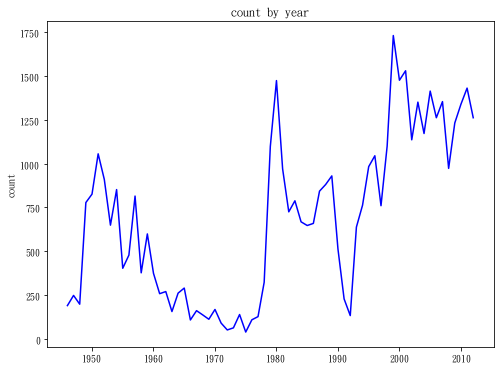

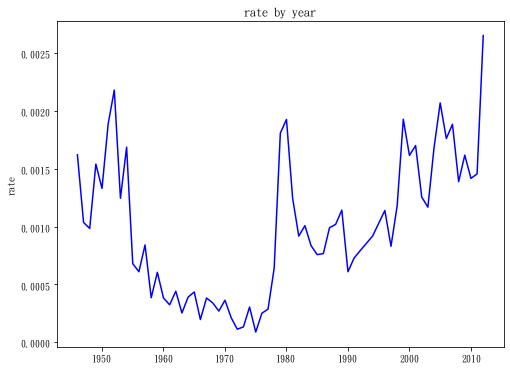

In [112]:
df_year=read_doc_select_by_year(path, unit, field, title)
# 繪製趨勢圖檢查
cat="count"
plot_doc_select_by_year(df_year,cat)
cat="rate"
plot_doc_select_by_year(df_year,cat)

In [ ]:
# 讀取檔案 #######################################
import pandas as pd
path="D:/my python/people/" 
title="公审"      
field ="token"     #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一
df=read_doc_select(path, unit, field, title)

## 範例二 大躍進與放衛星

In [113]:
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]
kw=["大跃进","卫星"]
title="大跃进"
field ="token"     #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一

In [114]:
res=doc_select(year, path, title, kw, field, unit)
df=res[0]

1946 done 6 117260 5.116834385127068e-05
1947 done 12 239468 5.0111079559690645e-05
1948 done 22 201284 0.00010929830488265337
1949 done 30 505117 5.939218042552518e-05
1950 done 23 621218 3.7024039870061716e-05
1951 done 10 559504 1.787297320483857e-05
1952 done 12 417450 2.874595759971254e-05
1953 done 5 521586 9.586146867438927e-06
1954 done 4 505159 7.918298991010752e-06
1955 done 65 593132 0.00010958774775260818
1956 done 97 783982 0.00012372733047442416
1957 done 2789 968678 0.002879181730151815
1958 done 11579 980682 0.011807089352103945
1959 done 10391 991154 0.0104837391565791
1960 done 7988 977345 0.008173163007944994
1961 done 1427 797292 0.0017898085017785204
1962 done 537 611632 0.0008779789154262694
1963 done 358 616087 0.0005810867620969116
1964 done 276 668885 0.0004126269837116993
1965 done 137 667432 0.00020526435651871652
1966 done 568 549394 0.0010338664055304571
1967 done 150 420647 0.0003565935332951382
1968 done 124 402227 0.0003082836308850475
1969 done 111 4157

In [115]:
# 隨機列印十筆
num=10
print_doc_select_random(df,num,title,field)

大跃进
人民日報_19601223_7_260018
 大跃进 以来 ， 各地 在 水力 风力 沼气 天然气 的 利用 方面 ， 取得 了 很大 的 进展 ， 但 作为 农用 动力 能源 ， 还有 许多 技术 问题 需要 研究 解决 
---------------------------
人民日報_19591121_8_234007
 自从 人民公社 和 大跃进 以来 ， 我们 国家 的 劳动 人民 正在 着手 把 祖国 雕塑 成 一个 社会主义 共产主义 的 巨像 
---------------------------
人民日報_19591016_3_231638
 公司党委 年初 全面 总结 了 1958 年 大跃进 的 经验 ， 在 全体 职工 中 开展 了以 优质 高产 为 中心 的 “ 六比 ” 竞赛 运动 ， 保证 了 第一季度 计划 的 超额完成 
---------------------------
人民日報_19820105_6_585519
 报道 说 ， 自民党 认为 ， 日本 不仅 需要 通过 卫星 拍摄 的 照片 “ 迅速 掌握 构成 潜在 威胁 的 苏联 远东 （ 地区 的 ） 军事 态势 ” ， 而且 需要 “ 迅速 察知 世界 形势 ” ， 这 就 要求 日本 “ 拥有 兔子 般的 长耳朵 ” 
---------------------------
人民日報_19570219_7_162664
 国际 地球物理 年 中 另 一 项目 ， 即 火箭 和 人造卫星 ， 也 是 在 国际 科学研究 中 各国 和平 竞赛 的 重要 对象 
---------------------------
人民日報_20100722_14_20029
 中国电信 为 新闻出版 单位 提供 网络 技术 和 产品 运营 服务 ， 形成 数字 出版物 在 互联网 移动网 卫星 通讯 网络 等 多 网络 通道 ， 在 手机 手持 阅读器 等 多种 终端 介质 上 的 传播 
---------------------------
人民日報_20120319_20_12088
 资源 一号 02 C 卫星 在 轨 测试 进展 顺利 
---------------------------
人民日報_19580320_7_190272
 扫盲 工作 大跃进 

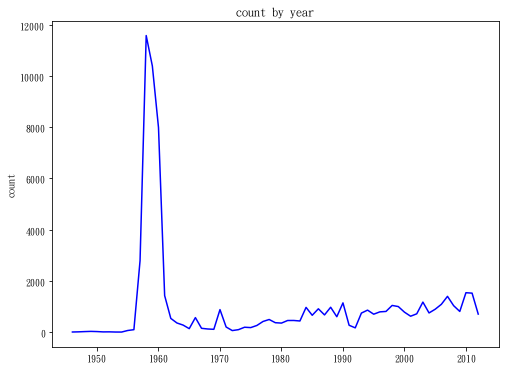

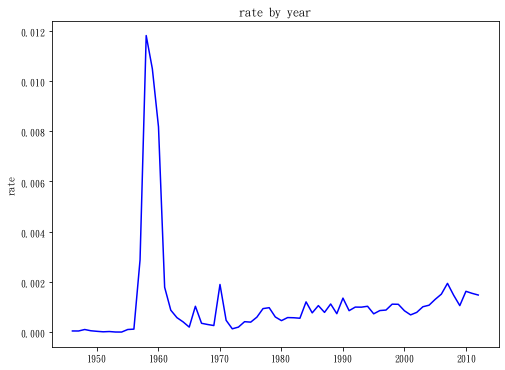

In [116]:
# 繪製趨勢圖檢查
df_year=read_doc_select_by_year(path, unit, field, title)
cat="count"
plot_doc_select_by_year(df_year,cat)
cat="rate"
plot_doc_select_by_year(df_year,cat)

In [118]:
# 讀取檔案 #######################################
import pandas as pd
# 必須要有的參數
title="大跃进"
field ="token"     #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一
df=read_doc_select(path, unit, field, title)

## 範例三：選取 tfidf

In [119]:
# 選擇年度
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]

path="D:/my python/people/" 
kw=[]   # 或聯結，空白表示不設條件
title="all"      
field ="tfidf"     #  token, doc_content tfidf, treerank 四選一
unit ="arti"     # sent, arti, para, word 四選一
res=doc_select(year, path, title, kw, field, unit)
df=res[0]

In [121]:
# 隨機列印十筆
num=10
print_doc_select_random(df,num,title,field)

all
人民日報_19620429_4_289575
厄瓜多尔,庄园主,农民,苏克雷,瓦市,斗争,印第安人,土地,美帝国主义,印第安,卡罗,香蕉,工人,剥削,赤道,基多,夺地,纪念碑,果品,无偿,劳动,瓜亚基尔,工资,联合会,团结,农业工人,生活,人口,占有,现政府,美国,农村,蓬初,贫困,大庄园,尖锐,联合,残酷,生产,沿海各省,贫民窟,泥沼,民主,城市,解雇,首都,民族矛盾,充饥,阶级矛盾,倾销,土地改革,寡头,高利贷,夺回,悲惨,廉价,大部分,改革,耕种,国家,公顷,反动,阴谋,确切,制度,每周,爱国,口号,火山,收获,组织,资本,提高,官方,公司,种子,政府,穿着,夺回去,猖狂进攻,地下火,包含,二十多公里,一百步,九口,两三代,一万五千多,势力,外国,年年月月,四百五十万,贪得,矛盾,总统,破旧不堪,领过,一公顷,人间地狱,向右走,粮食
---------------------------
人民日報_19880108_3_783393
浦口区,工业园,工学院,科学,南京,建设,协议,合作,生产,签订,公路,各显,其长,浦泗,宁六,严鸿珍,教育,国家教委,优化组合,互惠互利,科技成果,合作项目,联合体,南京市,该院,坐落,直属,地理环境,经济体制,体制改革,一所,论证,优惠政策,以西,基础设施,效益,支援,相结合,探索,新型,竞争力,要素,优惠,设施,适合,试验,实践,以南,转让,承担,道路,基地,规划,困难,学生,区域,大学,联合,人员,设计,开发,解决,正式,土地,稳定,长期,产品,社会,资金,国家,发展
---------------------------
人民日報_20090603_3_22377
客机,一架,遇难,坠毁,航空公司,300,12,起飞,伊朗,空中客车,伊尔,机场,纽约,美国航空公司,1991,DC,261,1994,26,264,1996,747,349,头朝下,皇后区,260,2003,276,牛瑞飞,克尔曼,名古屋,失火,新德里,肯尼迪,相撞,起落架,掉落,麦道,中国台湾,卫队,沙特,波音,尼日利亚,哈萨克斯坦,沙特阿拉伯,满载,故障,引擎,伊斯兰,运输机,上空,恶劣,中华,东南部,分钟,山区,士兵,首都,天气,中部,印度,革命,日本,城市
---------------------------
人民日報_19890129_6

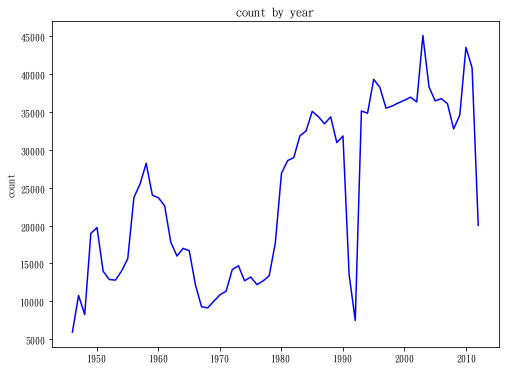

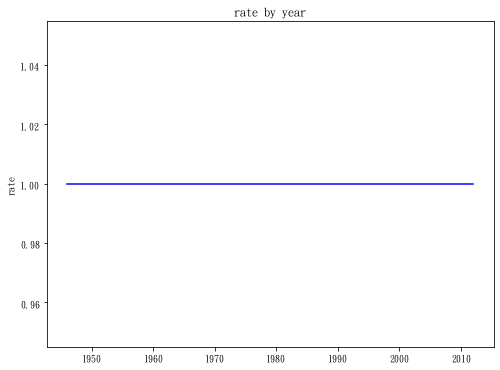

In [122]:
# 繪製趨勢圖檢查
df_year=read_doc_select_by_year(path, unit, field, title)
cat="count"
plot_doc_select_by_year(df_year,cat)
cat="rate"
plot_doc_select_by_year(df_year,cat)

In [123]:
# 讀取檔案 #######################################
import pandas as pd
# 必須要有的參數
print (unit, field, path)
df=read_doc_select_pkl(path, unit, field, title)

arti tfidf D:/my python/人民日報/


## 範例四：選取 textrank

In [19]:
# 選擇年度
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]

path="D:/my python/people/" 
kw=[]   # 或聯結，空白表示不設條件
title="all"      
field ="textrank"     #  token, doc_content tfidf, treerank 四選一
unit ="arti"     # sent, arti, para, word 四選一

In [20]:
res=doc_select(year, path, title, kw, field, unit)
df=res[0]

1946 done 5929 1947 done 10763 1948 done 8246 1949 done 18892 1950 done 19672 1951 done 13926 1952 done 12849 1953 done 12729 1954 done 13895 1955 done 15529 1956 done 23322 1957 done 25024 1958 done 27577 1959 done 23292 1960 done 22975 1961 done 21564 1962 done 17110 1963 done 15417 1964 done 16340 1965 done 15948 1966 done 11942 1967 done 9098 1968 done 9044 1969 done 9905 1970 done 10839 1971 done 11281 1972 done 14114 1973 done 14594 1974 done 12617 1975 done 13127 1976 done 12054 1977 done 12602 1978 done 13242 1979 done 17294 1980 done 26120 1981 done 27796 1982 done 27999 1983 done 30890 1984 done 31720 1985 done 34101 1986 done 33279 1987 done 32384 1988 done 33233 1989 done 29736 1990 done 30979 1991 done 13257 1992 done 7339 1993 done 34312 1994 done 34016 1995 done 38095 1996 done 37076 1997 done 34525 1998 done 34223 1999 done 35246 2000 done 35091 2001 done 36040 2002 done 34932 2003 done 43118 2004 done 38081 2005 done 36278 2006 done 36667 2007 done 35975 2008 done 3272

In [21]:
# 隨機列印十筆
num=10
print_doc_select_random(df,num,title,field)

all
人民日報_19730629_4_437329
会见,郭沫若,瑞典,中国大使馆,议员团,全体成员,周秋野,谢黎,王本祚,瑞典王国,赫德,临时代办,夫人,工作人员,郑万珍,王尔庆,今天下午,率领,曼和,谈话,右图,斯图莱,团长,埃利,副委员长,人大常委会,附图片,负责人,治安,友好,合影
---------------------------
人民日報_19531012_1_102091
朝鲜,和平,苏联,时期,朝鲜民主主义人民共和国,祖国,发展,经济,马林科夫,支持,致电,走狗,独立,外交关系,纪念日,苏联政府,朝鲜民主主义人民共和国政府,代表团,关系,建设,全世界,远东,保障,相南,罗希洛夫,莫斯科,外务,外交部长,破坏,共和国,政治,文化,事业,美帝国主义,干涉者,武装,阵营,统一,兄弟,奠定,维护,援助,友谊,两国人民,常任,祝贺,因素,苏联最高苏维埃,主席团,解放战争,年青,友好合作,苏联部长会议,胜利,承认,确信,战争,国家,民主,和平统一,会谈,表示祝贺,贺电,建设祖国,委员长,阶段,巨大贡献,平等,鼓舞,内阁
---------------------------
人民日報_19660603_4_356815
渔船,水泥,木材,乌石,公社,渔业,风帆,海康县,缺乏,抗风,船身,生产,费用,支持,提高,节约,同类,修理,木船,广东省,木质,渗漏水,人员,食用,投入,船员,抗冲击,湛江,淡水,表面,水泥船,无缝,社员,花费,制成,联接,整体,阻力,咸化,浮力,劳动,材料,航速,水产局,海南岛,专署,大寨,能力,克服,森林,成本,造价,指导,技术,钢丝网,沙浆,铁钉,桐油,烤船,结构,坚固,船桅,光滑,吃水,作业,学习,渔民,和弦,采购,造船,插板,出航,吨位,龙骨,劳动力,造出来,生活,试制,效果,增产,雷州半岛,自制,制造,经验,节省
---------------------------
人民日報_20000731_10_1164513
中国,金融,税收,推出,建设,学会,债券,增长,特惠,农贷,队伍,发展,业务,旅游,广东海关,小额,员工,新河县,信用社,发行,农村,承销商,全国,分销,金融机构,代表大会,局机关,手续,合作,系统,报价,中国太平洋保险公司,分局,刷卡,简化,承销,严肃,支持,购物,餐饮,临淄,收贷,收息,动员,银行间,农信社,

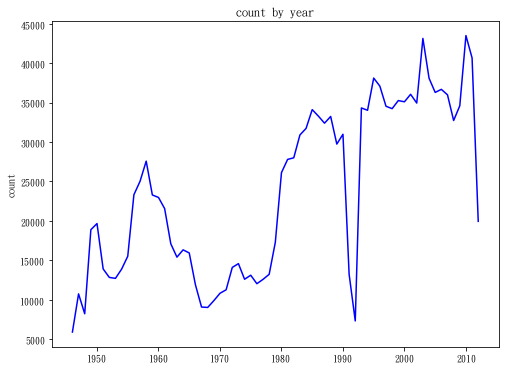

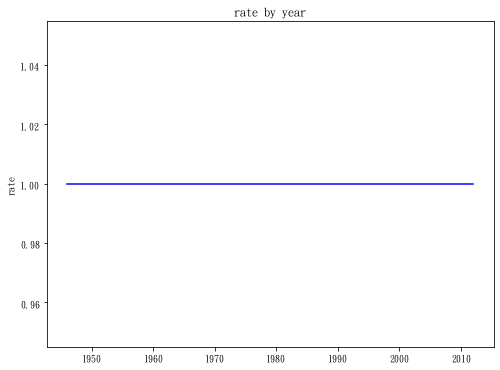

In [22]:
# 繪製趨勢圖檢查
df_year=read_doc_select_by_year(path, unit, field, title)
cat="count"
plot_doc_select_by_year(df_year,cat)
cat="rate"
plot_doc_select_by_year(df_year,cat)

In [128]:
# 讀取檔案 #######################################
import pandas as pd
# 必須要有的參數
print (unit, field, path)
df=read_doc_select_pkl(path, unit, field, title)

arti textrank D:/my python/人民日報/


ValueError: Excel file format cannot be determined, you must specify an engine manually.

## 範例五：中華民族

In [129]:
# 選擇年度
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]

path="D:/my python/people/" 
kw=["中華民族","傳統文化","歷史悠久","民族文化","民族復興","民族主義","文化遗产","五千年","传统美德","中国文化"]
title="中華民族"
field ="token"     #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一

In [130]:
res=doc_select(year, path, title, kw, field, unit)
df=res[0]

1946 done 2 117260 1.7056114617090227e-05
1947 done 4 239468 1.6703693186563548e-05
1948 done 11 201284 5.4649152441326684e-05
1949 done 89 505117 0.000176196801929058
1950 done 81 621218 0.0001303890099771739
1951 done 80 559504 0.00014298378563870856
1952 done 88 417450 0.00021080368906455863
1953 done 110 521586 0.0002108952310836564
1954 done 146 505159 0.0002890179131718924
1955 done 171 593132 0.00028830007485686156
1956 done 230 783982 0.0002933740825682222
1957 done 209 968678 0.00021575797117308332
1958 done 152 980682 0.00015499417752135757
1959 done 178 991154 0.0001795886411193417
1960 done 165 977345 0.0001688247241250531
1961 done 141 797292 0.00017684863262142352
1962 done 148 611632 0.00024197556700761242
1963 done 128 616087 0.0002077628646603483
1964 done 237 668885 0.00035432099688287224
1965 done 129 667432 0.00019327811672200314
1966 done 126 549394 0.0002293436040437282
1967 done 26 420647 6.180954577115729e-05
1968 done 14 402227 3.48062163902473e-05
1969 done 16

In [131]:
# 隨機列印十筆
num=10
print_doc_select_random(df,num,title,field)

中華民族
人民日報_20071102_5_6299
 当前 我国 非 物质 文化遗产 面临 濒危 失传 的 危机 ， 抢救 和 保护 工作 刻不容缓 
---------------------------
人民日報_20070531_9_22153
 但是 在 欣喜 于 成绩 的 同时 ， 许多 专家 也 指出 ， 必须 清醒 地 看到 我国 的 非 物质 文化遗产 保护 正 面临 着 前所未有 的 挑战 ， 有 大量 理论 和 实践 问题 需要 研究 解决 
---------------------------
人民日報_19950201_7_1000488
 实行 改革开放 以来 ， 党和政府 一方面 提出 要 弘扬 民族文化 ， 一方面 主张 要 吸取 外来文化 中 的 优秀成果 
---------------------------
人民日報_19910811_5_882204
 在 文化 方面 ， 坚持 以 马克思列宁主义 为 指导 ， 坚持 为人民服务 ， 为 社会主义 服务 的 方向 ， 继承 和 发扬 祖国 优秀 文化遗产 ， 借鉴 和 吸收 世界 上 一切 优秀 文化 成果 ， 不断 提高 全 民族 的 思想道德 和 科学文化 素质 ， 建设 社会主义 精神文明 
---------------------------
人民日報_20100604_17_26079
 即将 到来 的 6 月 12 日 ， 是 我国 第五个 文化遗产 日 
---------------------------
人民日報_20031228_4_1290140
 广大 电影 工作者 积极 投身 时代 洪流 ， 扎根 民族文化 沃土 ， 吸收 世界 文明 精华 ， 创作 出 一批 讴歌 伟大 时代 反映 现实生活 弘扬 民族精神 的 优秀 影片 ， 为 丰富 人民 群众 的 精神 文化 生活 做出 了 重要 贡献 
---------------------------
人民日報_20070323_5_29331
 ” … … “ 饮水思源 ” “ 滴水之恩 ， 涌泉相报 ” ， 中华民族 素有 感恩 的 传统美德 
---------------------------
人民日報_20110523_16_25775
 盟委 行署 把握 机遇 ， 立足 本地 实际 

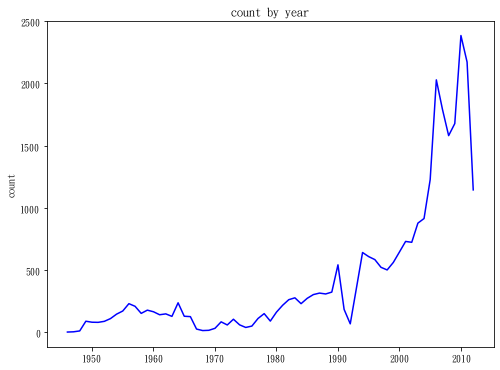

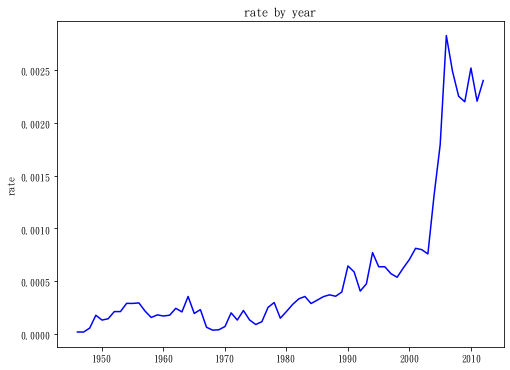

In [132]:
# 繪製趨勢圖檢查
df_year=read_doc_select_by_year(path, unit, field, title)
cat="count"
plot_doc_select_by_year(df_year,cat)
cat="rate"
plot_doc_select_by_year(df_year,cat)

In [133]:
###############################
path="D:/my python/people/" 
title="中華民族"
field ="token"     #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一
df=read_doc_select(path, unit, field, title)

## 範例六：美国

In [134]:
# 選擇年度
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]

path="D:/my python/people/" 
kw=["美国","美帝"]
title="美国"
field ="token"     #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一

In [135]:
res=doc_select(year, path, title, kw, field, unit)
df=res[0]

1946 done 4494 117260 0.03832508954460174
1947 done 6445 239468 0.02691382564685052
1948 done 5289 201284 0.026276306114743346
1949 done 14003 505117 0.027722290083287634
1950 done 33653 621218 0.054172609293355954
1951 done 26352 559504 0.047098858989390605
1952 done 27568 417450 0.06603904659240628
1953 done 18241 521586 0.03497218100179069
1954 done 20443 505159 0.0404684465683082
1955 done 17345 593132 0.029243068996445985
1956 done 14300 783982 0.01824021469880686
1957 done 23488 968678 0.02424747955460948
1958 done 36097 980682 0.03680805806571345
1959 done 23859 991154 0.024071940384642547
1960 done 44316 977345 0.04534325135955062
1961 done 32765 797292 0.04109535778610597
1962 done 36261 611632 0.059285648886912394
1963 done 31665 616087 0.05139696179273382
1964 done 41118 668885 0.06147245042122338
1965 done 53570 667432 0.08026285823874192
1966 done 34033 549394 0.061946435527144454
1967 done 18457 420647 0.043877645626855775
1968 done 16779 402227 0.04171525034371139
1969 d

In [136]:
# 隨機列印十筆
num=10
print_doc_select_random(df,num,title,field)

美国
人民日報_19691228_5_392583
 据 报道 ， 尼克松 将 提出 的 下 一 财政年度 的 预算 达 二千 亿美元 以上 ， 一点 也 没有 “ 收缩 ” ， 而 在 “ 制止 通货膨胀 ” 的 借口 下 ， 一九七 ○ 财政年度 美国 各级 政府 的 苛捐杂税 竟 高 达 三千 亿美元 ， 平均 每人 要 负担 一千五百 美元 
---------------------------
人民日報_19720628_5_421614
 ’ 越南 人民 面对 美帝国主义 极其 野蛮 的 罪行 ， 仇恨 满腔 ， 决心 为 保卫 自己 的 祖国 而 粉碎 美帝国主义 的 一切 疯狂 战争 升级 
---------------------------
人民日報_19670914_6_370134
 七年 前 ， 美国 侵越 战费 一年 不过 三 亿美元 ， 但是 目前 美国 侵略 越南 的 军费 已 增加 到 一年 三百 亿美元 ， 美国 侵越 军费 的 急剧 增加 ， 给 美国 财政 带来 了 严重 恶果 ， 联邦 预算赤字 大增 
---------------------------
人民日報_19530816_6_100126
 车门 一开 ， 美国 的 破 皮鞋 皮带 水壶 衣服 毯子 … … 就 被 猛力 打 下车 来 ， 像 垃圾 一样 
---------------------------
人民日報_19591214_5_235479
 这家 报纸 和 “ 友谊 报 ” 还 引证 缅甸 “ 民族 报 ” 的话 说 ， 美国 的 这种 倾销 将 在 这个 地区 造成 经济危机 
---------------------------
人民日報_20120613_16_2029
 英国队 进入 A 组 ， 美国队 位列 B 组 ， 其他 球队 则 依据 2012 年 1 月 4 日 的 世界排名 和 蛇形 分组 的 规定 依次 落位 
---------------------------
人民日報_19590727_4_226300
 美国 最近 举行 了 所谓 “ 被 奴役 国家 周 ” ， 这 是 美国 统治集团 为了 阻挠 国际局势 缓和 ， 干涉 社会主义 国家 内政 并 企图 挑拨 社会主义 国家 关系 的 一个 恶毒 的 诽

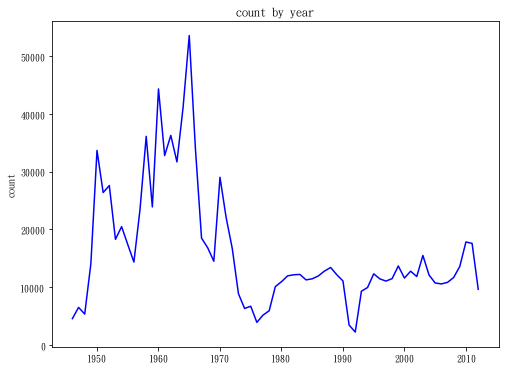

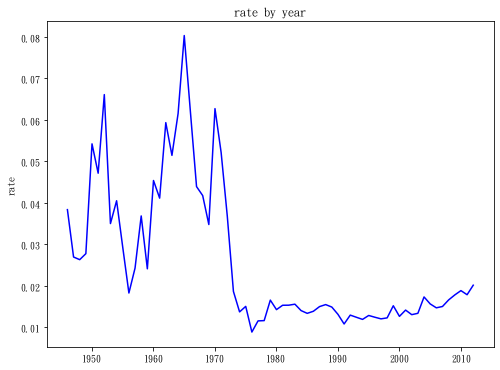

In [137]:
# 繪製趨勢圖檢查
df_year=read_doc_select_by_year(path, unit, field, title)
cat="count"
plot_doc_select_by_year(df_year,cat)
cat="rate"
plot_doc_select_by_year(df_year,cat)

In [167]:
###############################
path="D:/my python/people/" 
title="美国"
field ="token"     #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一
df=read_doc_select_pkl(path, unit, field, title)

## 範例七：台灣

In [139]:
# 選擇年度
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]

path="D:/my python/people/" 
kw=["台湾"]
title="台灣"
field ="token"   #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一

In [140]:
res=doc_select(year, path, title, kw, field, unit)
df=res[0]

1946 done 74 117260 0.0006310762408323384
1947 done 451 239468 0.00188334140678504
1948 done 169 201284 0.0008396097056894736
1949 done 981 505117 0.0019421242999146733
1950 done 4717 621218 0.007593147655090483
1951 done 1305 559504 0.0023324230032314335
1952 done 470 417450 0.0011258833393220744
1953 done 518 521586 0.0009931248154666729
1954 done 4771 505159 0.009444551121528073
1955 done 4674 593132 0.007880202046087548
1956 done 2118 783982 0.0027015926386064985
1957 done 2413 968678 0.0024910238489983254
1958 done 6547 980682 0.006675966317317948
1959 done 1128 991154 0.00113806734372257
1960 done 2972 977345 0.00304089139454338
1961 done 1432 797292 0.0017960797298856629
1962 done 1573 611632 0.002571807884479556
1963 done 1288 616087 0.0020906138256447547
1964 done 1182 668885 0.0017671199085044515
1965 done 916 667432 0.0013724244567236811
1966 done 508 549394 0.0009246551655096342
1967 done 309 420647 0.0007345826785879847
1968 done 420 402227 0.001044186491707419
1969 done 3

In [141]:
# 隨機列印十筆
num=10
print_doc_select_random(df,num,title,field)

台灣
人民日報_19721022_3_426751
 达尔曼 大使 指出 ， “ 印度支那 问题 的 和平解决 ， 朝鲜 人民 的 统一 和 作为 中华人民共和国 不可分割 的 一部分 台湾省 的 归还 ， 必将 促进 世界和平 ， 特别 是 东南亚地区 的 和平 
---------------------------
人民日報_19490401_3_32344
 大批 中下级 官员 的 家属 ， 也 被 当做 人质 般的 运到 台湾 
---------------------------
人民日報_19550221_3_121004
 会上 有 二十九 位 代表 发言 ， 他们 一致 表示 要 坚决 完成 今年 的 农业 增产 任务 ， 以 支援 中国人民解放军 解放台湾 ， 消灭 蒋介石 卖国 集团 
---------------------------
人民日報_20050916_4_10432
 台湾 民众 希望 加强 两岸 交流 合作 早日 实现 “ 三通 ” 促进 台海 和平 稳定 的 愿望 更加 强烈 
---------------------------
人民日報_19970807_6_1085797
 社民党 党首 土井多贺子 指出 ， 修改 后 的 “ 日 美 防卫 合作 方针 ” 应 载明 台湾海峡 地区 不 包括 在 日 美 防卫 范围 内 
---------------------------
人民日報_19541004_4_115346
 最近 ， 美国 侵略 集团 扬言 要 以 武力 阻挠 中国 人民 解放台湾 ， 加紧 支持 和 供应 蒋介石 卖国 集团 进行 更加 猖獗 的 骚扰 性 和 破坏性 战争 ， 并 阴谋 扩大 第七 舰队 的 侵略 范围 ， 使 远东 和平 和 安全 受到 更加 严重 的 威胁 
---------------------------
人民日報_19580913_3_205043
 最近 ， 美帝国主义 在 台湾海峡 地区 制造 紧张局势 ， 更加 激起 蒙古 人民 的 愤怒 
---------------------------
人民日報_20110120_2_39857
 6. 双方 强调 台湾 问题 在 中美关系 中 的 重要性 
---------------------------


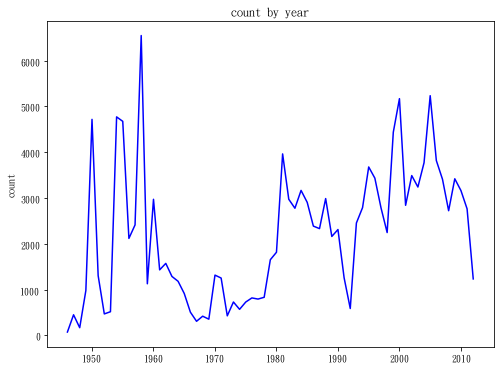

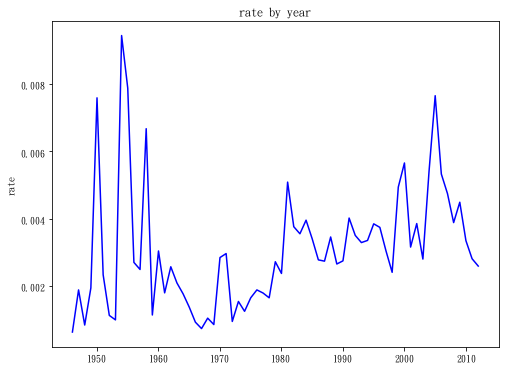

In [142]:
# 繪製趨勢圖檢查
df_year=read_doc_select_by_year(path, unit, field, title)
cat="count"
plot_doc_select_by_year(df_year,cat)
cat="rate"
plot_doc_select_by_year(df_year,cat)

In [143]:
##################################################
path="D:/my python/people/" 
kw=["台湾"]
title="台灣"
field ="token"   #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一
df=read_doc_select(path, unit, field, title)

## 範例八：建設

In [144]:
# 選擇年度
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]

path="D:/my python/people/" 
kw=["建设"]
title="建設"
field ="doc_content"     #  token, doc_content tfidf, treerank 四選一
unit ="word"     # sent, arti, para, word 四選一

In [145]:
res=doc_select(year, path, title, kw, field, unit)
df=res[0]

1946 done 430 5937 0.07242715176014822
1947 done 577 10771 0.05356977068053106
1948 done 971 8247 0.1177397841639384
1949 done 6370 18988 0.33547503686538865
1950 done 6986 19740 0.35390070921985817
1951 done 5978 13959 0.428254172935024
1952 done 10369 12915 0.8028648857917151
1953 done 12606 12801 0.9847668150925709
1954 done 12147 14014 0.8667760810617954
1955 done 11571 15643 0.7396918749600461
1956 done 10850 23743 0.45697679316008927
1957 done 14538 25519 0.5696931697950547
1958 done 15239 28261 0.5392236651215456
1959 done 17623 24040 0.7330698835274543
1960 done 15736 23680 0.664527027027027
1961 done 6049 22638 0.26720558353211415
1962 done 4327 17846 0.24246329709738876
1963 done 5714 16013 0.3568350715044027
1964 done 6308 17007 0.3709060974892691
1965 done 5690 16699 0.340738966405174
1966 done 4581 12447 0.3680404916847433
1967 done 2085 9395 0.22192655667908462
1968 done 2848 9334 0.3051210627812299
1969 done 3455 10307 0.33520908120694676
1970 done 5540 11150 0.496860986

In [146]:
# 隨機列印十筆
num=10
print_doc_select_random(df,num,title,field)

建設
人民日報_19750916_4_467325
民族经济和民族文化、加强国防【建设】的事业中，取得了可喜的成就。
---------------------------
人民日報_19980728_10_1092135
，必须加强马克思主义理论队伍【建设】，造就一大批高素质、能够适应
---------------------------
人民日報_20101103_1_7406
。他说，要增加政府投入，城市【建设】要为幼儿园留出空间，千方百计
---------------------------
人民日報_19590730_2_226506
公里左右，都是为支援当前工业【建设】和加速物资运输修建的。从贵阳
---------------------------
人民日報_20110719_4_18929
法规，完善配套规定，建立工程【建设】领域法规制度体系。把惩治违纪
---------------------------
人民日報_20100628_14_23263
人才在经济社会发展和人才队伍【建设】中的引领作用，比如，通过“现
---------------------------
人民日報_20010407_6_1226832
流动生活方式，荔浦县分期分批【建设】异地安置村。日前，24户百余
---------------------------
人民日報_20050118_14_35200
部门要进一步增强搞好惩防体系【建设】的责任感和自觉性，把建立健全
---------------------------
人民日報_19740718_1_451712
认识到加强马克思主义理论队伍【建设】，培养能文能武的革命战士的重
---------------------------
人民日報_19810504_1_565702
，了解我党60年来领导革命和【建设】的历史成就，了解建国31年来
---------------------------


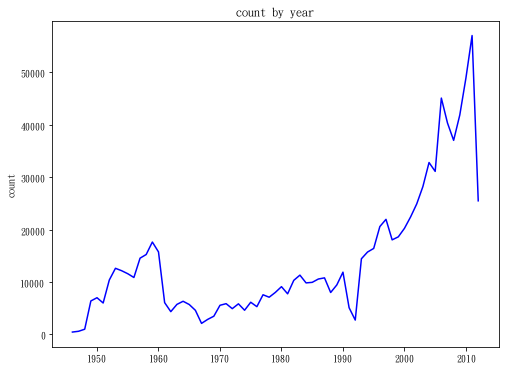

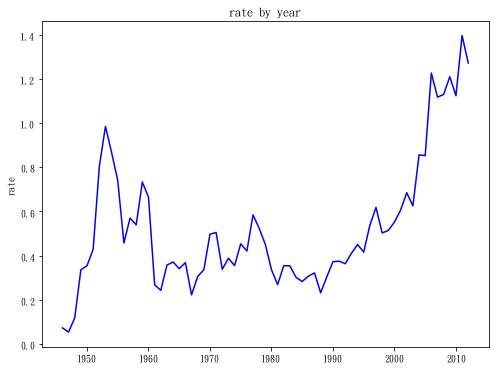

In [147]:
# 繪製趨勢圖檢查
df_year=read_doc_select_by_year(path, unit, field, title)
cat="count"
plot_doc_select_by_year(df_year,cat)
cat="rate"
plot_doc_select_by_year(df_year,cat)

In [148]:
###############################
path="D:/my python/people/" 
title="建設"
field ="doc_content"     #  token, doc_content tfidf, treerank 四選一
unit ="word"     # sent, arti, para, word 四選一
df=read_doc_select(path, unit, field, title)

## 範例九：鬥爭

In [149]:
# 選擇年度
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]

path="D:/my python/people/" 
kw=["斗争"]
title="鬥爭"
field ="doc_content"     #  token, doc_content tfidf, treerank 四選一
unit ="word"     # sent, arti, para, word 四選一

In [150]:
res=doc_select(year, path, title, kw, field, unit)
df=res[0]

1946 done 2218 5937 0.3735893548930436
1947 done 5335 10771 0.4953114845418253
1948 done 3355 8247 0.40681459924821145
1949 done 8063 18988 0.42463661259742996
1950 done 8611 19740 0.4362208713272543
1951 done 8733 13959 0.6256178809370299
1952 done 11083 12915 0.8581494386372435
1953 done 7369 12801 0.5756581517068979
1954 done 6515 14014 0.46489225060653633
1955 done 7528 15643 0.48123761426836287
1956 done 6338 23743 0.2669418354883545
1957 done 11729 25519 0.45961832360202204
1958 done 11651 28261 0.4122642510880719
1959 done 11402 24040 0.4742928452579035
1960 done 20931 23680 0.883910472972973
1961 done 12414 22638 0.5483699973495891
1962 done 11135 17846 0.6239493443908999
1963 done 17487 16013 1.0920502092050208
1964 done 19756 17007 1.1616393249838302
1965 done 16977 16699 1.0166477034552968
1966 done 18039 12447 1.4492648831043624
1967 done 20155 9395 2.145290047897818
1968 done 22504 9334 2.410970644953932
1969 done 18511 10307 1.7959639080236733
1970 done 21902 11150 1.9643

In [151]:
# 隨機列印十筆
num=10
print_doc_select_random(df,num,title,field)

鬥爭
人民日報_20051112_5_5139
式，与国家海洋开发战略和军事【斗争】准备的迫切需要不相适应。宋兴
---------------------------
人民日報_19710823_1_410691
，它是越南、柬埔寨、老挝人民【斗争】的坚强后方。社会主义中国过去
---------------------------
人民日報_19730201_2_431048
容。这些新干部对党内两条路线【斗争】的历史经验懂得较少，缺乏辨别
---------------------------
人民日報_19630205_3_302734
一贯成功地把对帝国主义的正面【斗争】同进行有原则的谈判和有原则的
---------------------------
人民日報_20000222_12_1183241
在坚决进行反分裂、反“台独”【斗争】的同时，祖国大陆根据八项主张
---------------------------
人民日報_19690127_5_383088
县爆发的反对美国核潜艇的群众【斗争】之后，东京进步学生为反对腐朽
---------------------------
人民日報_19731210_4_444014
级革命事业的接班人，是在群众【斗争】中产生的，是在革命大风大浪的
---------------------------
人民日報_19610115_4_261534
他们对古巴工人在反对侵略者的【斗争】中的有效的支持，并且要求政府
---------------------------
人民日報_19540921_4_114977
役和屠杀，一方面是英勇不屈的【斗争】。尽管血流成河，山岳和草木都
---------------------------
人民日報_19710109_0_1319994
确路线的重要性，不断分析路线【斗争】的新形势，肃清刘少奇修正主义
---------------------------


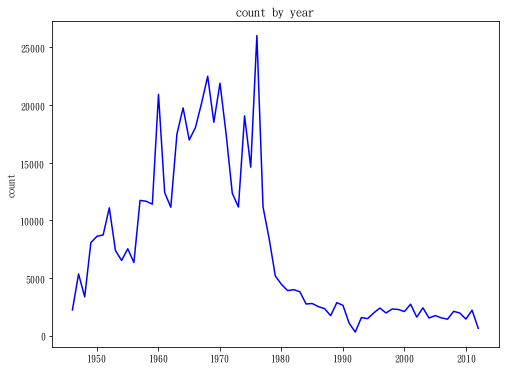

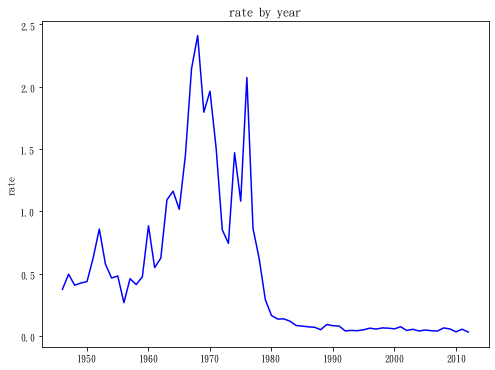

In [152]:
# 繪製趨勢圖檢查
df_year=read_doc_select_by_year(path, unit, field, title)
cat="count"
plot_doc_select_by_year(df_year,cat)
cat="rate"
plot_doc_select_by_year(df_year,cat)

In [153]:
path="D:/my python/people/" 
title="鬥爭"
field ="doc_content"     #  token, doc_content tfidf, treerank 四選一
unit ="word"     # sent, arti, para, word 四選一
df=read_doc_select(path, unit, field, title)

## 範例十：迫害

In [154]:
# 選擇年度
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]

path="D:/my python/people/" 
kw=["迫害"]
title="迫害"
field ="token"     #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一

In [155]:
res=doc_select(year, path, title, kw, field, unit)
df=res[0]

1946 done 44 117260 0.000375234521575985
1947 done 126 239468 0.0005261663353767518
1948 done 243 201284 0.0012072494584765804
1949 done 598 505117 0.0011838841298154686
1950 done 807 621218 0.0012990608771799915
1951 done 834 559504 0.0014906059652835368
1952 done 1028 417450 0.0024625703677087075
1953 done 595 521586 0.0011407514772252322
1954 done 381 505159 0.000754217978893774
1955 done 337 593132 0.0005681703229635225
1956 done 450 783982 0.0005739927702421739
1957 done 401 968678 0.0004139662509110355
1958 done 547 980682 0.0005577750993696224
1959 done 1129 991154 0.0011390762686726784
1960 done 906 977345 0.0009270012124684733
1961 done 645 797292 0.0008089884258214054
1962 done 1185 611632 0.0019374395061082482
1963 done 1137 616087 0.00184551857124075
1964 done 834 668885 0.0012468511029549176
1965 done 706 667432 0.0010577856620599551
1966 done 907 549394 0.0016509099116481067
1967 done 1629 420647 0.003872605771585201
1968 done 740 402227 0.0018397571520559286
1969 done 66

In [156]:
# 隨機列印十筆
num=10
print_doc_select_random(df,num,title,field)

迫害
人民日報_19520726_1_86511
 泰国政府 这种 残暴 的 迫害 和 无耻 的 勒索 行为 ， 是 我国 广大 归国华侨 华侨 家属 和 全国 人民 所 绝对 不能容忍 的 
---------------------------
人民日報_19521225_1_91822
 在 联合国 第七届 大会 开会 的 时候 ， 对 朝中 战俘 的 这种 迫害 一直 在 进行 着 
---------------------------
人民日報_19801222_1_555446
 林彪 江青 一伙 正是 利用 我国 政治 制度 上 的 这一 重大 缺陷 ， 明目张胆 地 诬告陷害 党和国家 领导人 ， 肆无忌惮 地 迫害 镇压 广大干部 和 群众 ， 疯狂 地 进行 推翻 我国 无产阶级专政 的 国家 政权 的 反革命 犯罪活动 ， 把 本来 就 很 不 健全 的 民主法制 破坏 殆尽 
---------------------------
人民日報_19600229_2_240262
 然而 无论 在 什么 情况 下 ， 在 所有 的 国家 里 ， 共产主义 运动 都 在 经受锻炼 和 日益 发展 着 ； 它 已经 如此 根深蒂固 ， 摧残 和 迫害 削弱 不了 它 ， 困顿 不了 它 ， 反而 加强 了 它 
---------------------------
人民日報_19761106_1_482291
 他们 口口声声 高喊 拥护 毛主席 ， 代表 毛主席 ， 背地里 却 疯狂 反对 毛主席 ， 迫害 毛主席 
---------------------------
人民日報_19790328_3_514198
 他们 残酷 地 迫害 革命 干部 和 群众 ， 大 搞 法西斯 专政 ， 依人 不 依法 依言 不 依法 ， 以 个人 批条子 或 口头 “ 指示 ” 任意 捕人 拘人 ， 制造 了 许多 冤假错案 ， 侵犯 公民 的 人身自由 和 民主权利 的 现象 十分 严重 
---------------------------
人民日報_19690806_5_388290
 解放前 九溪 澳村 住 有 二 十几户 人家 ， 被 国民党 反动派 迫害 得 家破人亡 ， 最后 只 剩下 十几户 
---------------------

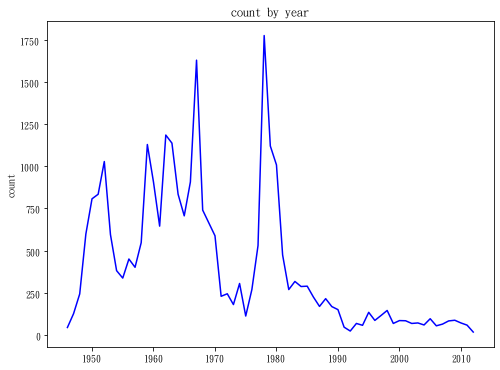

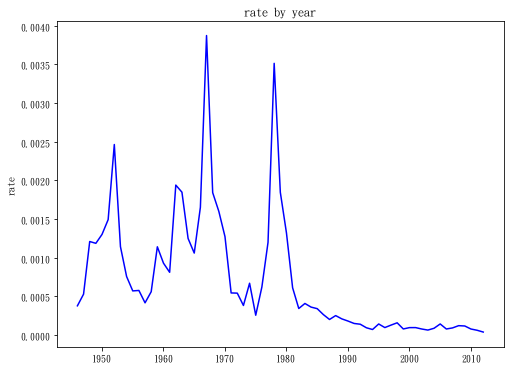

In [157]:
# 繪製趨勢圖檢查
df_year=read_doc_select_by_year(path, unit, field, title)
cat="count"
plot_doc_select_by_year(df_year,cat)
cat="rate"
plot_doc_select_by_year(df_year,cat)

In [158]:
######################################
path="D:/my python/people/" 
title="迫害"
field ="token"     #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一
df=read_doc_select(path, unit, field, title)

## 範例十一：死刑

In [159]:
# 選擇年度
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]

path="D:/my python/people/" 
kw=["死亡","死刑", "处死","自缢","处决","判刑"]
title="死刑"
field ="token"     #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一

In [160]:
res=doc_select(year, path, title, kw, field, unit)
df=res[0]

1946 done 178 117260 0.0015179942009210302
1947 done 267 239468 0.0011149715202031169
1948 done 266 201284 0.0013215158681266271
1949 done 990 505117 0.0019599419540423306
1950 done 1136 621218 0.0018286656214082657
1951 done 1217 559504 0.002175140839028854
1952 done 1047 417450 0.002508084800574919
1953 done 868 521586 0.0016641550961873977
1954 done 546 505159 0.0010808478122729674
1955 done 574 593132 0.0009677441109230324
1956 done 707 783982 0.0009018064190249266
1957 done 942 968678 0.0009724593724643277
1958 done 956 980682 0.0009748318007264332
1959 done 998 991154 0.001006907100208444
1960 done 875 977345 0.0008952826279358875
1961 done 653 797292 0.0008190223907928337
1962 done 661 611632 0.0010807152012975122
1963 done 684 616087 0.0011102328080287362
1964 done 521 668885 0.0007789081830209976
1965 done 481 667432 0.0007206726677773915
1966 done 372 549394 0.0006771096881291023
1967 done 235 420647 0.0005586632021623832
1968 done 275 402227 0.0006836935362370005
1969 done 2

In [161]:
# 隨機列印十筆
num=10
print_doc_select_random(df,num,title,field)

死刑
人民日報_20091106_8_6108
 一个月 后 ， 一封信 转到 县 纪委 ， 举报 派出所 某 民警 玩忽职守 致 人 死亡 却 逍遥法外 
---------------------------
人民日報_19950306_7_1004715
 警方 说 ， 目前 还 无法 确定 死者 的 身份 和 死亡 原因 ， 但 警方 从 死者 的 衣着打扮 判断 ， 死者 可能 是 一名 无家可归 的 妇女 
---------------------------
人民日報_20020508_7_1266474
瑞士联邦 卫生局 人士 6 日 证实 ， 瑞士 近日 又 发现 1 例 克雅氏症 患者 ， 这 名 患者 目前 已 死亡 
---------------------------
人民日報_19740608_5_450309
 号召书 特别 指出 ， 六月 四日 ， 朗诺 集团 对 青年 大中学生 进行 了 最 野蛮 的 镇压 ， 它 命令 其 代理人 高 桑金 和 塔家 这 两名 伪 部长 野蛮 地 威胁 赤手空拳 的 青年 大中学生 ， 并且 派 了 武装 军警 冲进 了 “ 尤贡托 ” 中学 ， 用 机枪 向 青年 大中学生 扫射 ， 致使 多 人 死亡 受伤 
---------------------------
人民日報_20070626_5_19291
 最高人民法院 有关 负责人 表示 ， 今年 最高人民法院 统一 行使 死刑 案件 核准权 后 ， 死刑 案件 的 证据 标准 更 高 ， 死刑 适用 的 标准 也 更加 严格 
---------------------------
人民日報_19541111_3_116877
 主从 犯 中 二十四名 已 被 依法 分别 判处死刑 和 徒刑 
---------------------------
人民日報_19550209_4_120578
 在 希特勒 占领者 一九四四年 四月 处死 一批 法国 爱国者 的 盖拉 尔堡 （ 夏朗德 海滨 省 ） 的 一个 纪念碑 前 聚集 了 五千 人 
---------------------------
人民日報_19970206_7_1076210
 书记员 首先 问 ， 你 认为 辛普森 “ 导致 了 ” 戈 德曼 （ 辛氏 前妻 男

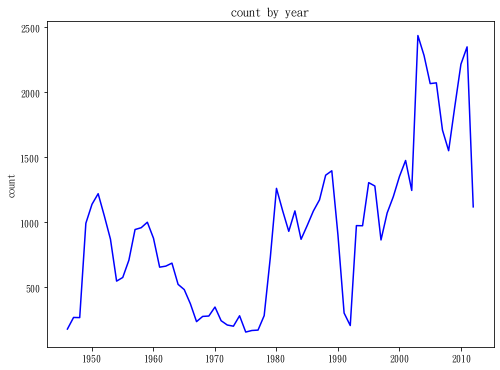

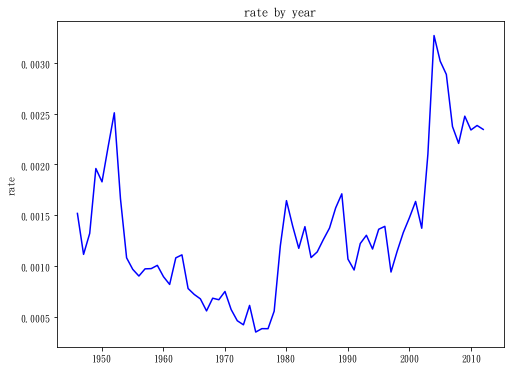

In [162]:
# 繪製趨勢圖檢查
df_year=read_doc_select_by_year(path, unit, field, title)
cat="count"
plot_doc_select_by_year(df_year,cat)
cat="rate"
plot_doc_select_by_year(df_year,cat)

In [163]:
######################################
path="D:/my python/people/" 
title="死刑"
field ="token"     #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一
df=read_doc_select(path, unit, field, title)

# 加入 people 模組

In [1]:
import people


    歡迎進入 people 模組，函數列表
    資料選取
        (df, df_year)=people.doc_select(year, path, title, kw, field, unit)
        df=people.read_doc_select(path, unit, field, title)  
        df_year=people.read_doc_select_year(path, unit, field, title)  
        people.plot_doc_select_year(df_year)
        people.print_doc_select_random(df,num,title,field)
        people.print_filename(filenames, field)
        df=people.read_doc_select_pkl(path, unit, field,title)  
    詞頻與詞對
        df=people.key_word_trend_year(kw, year,path)   
        df_corpus=people.corpus_map_year(df,title, kw, corpus,path,window)
        df_corpus=people.read_corpus_map_year(path,title)
        df_pn=people.sentiment(path, df, title)
        df_pn=people.read_sentiment(path, df, title)
    主題分析
        (df_topic, df, df_lsa)=people.topic model(doc_list,num_i, method)  
        ts=people.plot_topic_model_trend(year, df_lsa,topics, num_i) 
        people.plot_topic_model_pei(topics, ts)
        people.plot_topic_model_bar(

## 範例一：公审

In [2]:
# 選擇年度
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]
path="D:/my python/people/" 
kw=["公审","判处", "死刑","审判","判決","审判","处決",]   # 或聯結，空白表示不設條件
title="公审"      
field ="token"     #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一
res=people.doc_select(year, path, title, kw, field, unit)

1946 done 190 117260 0.0016203308886235715
1947 done 248 239468 0.00103562897756694
1948 done 198 201284 0.0009836847439438803
1949 done 778 505117 0.0015402372123686195
1950 done 826 621218 0.0013296459535943905
1951 done 1056 559504 0.0018873859704309531
1952 done 910 417450 0.0021799017846448675
1953 done 649 521586 0.0012442818633935726
1954 done 852 505159 0.00168659768508529
1955 done 403 593132 0.0006794440360661707
1956 done 478 783982 0.0006097078759461314
1957 done 815 968678 0.0008413528540959947
1958 done 377 980682 0.0003844263481944198
1959 done 599 991154 0.0006043460451150881
1960 done 374 977345 0.0003826693746834536
1961 done 258 797292 0.0003235953703285622
1962 done 270 611632 0.0004414419127841578
1963 done 156 616087 0.0002532109913047995
1964 done 261 668885 0.00039020160416215044
1965 done 290 667432 0.0004345011926308598
1966 done 108 549394 0.0001965802320374813
1967 done 161 420647 0.00038274372573678166
1968 done 137 402227 0.0003406036889617057
1969 done 11

In [4]:
path="D:/my python/people/" 
title="公审"      
field ="token"     #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一
df=people.read_doc_select(path, unit, field, title)

## 範例二 大躍進與放衛星

In [3]:
# 選擇年度
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]
path="D:/my python/people/" 
kw=["公审","判处", "死刑","审判","判決","审判","处決",]   # 或聯結，空白表示不設條件
title="公审"      
field ="token"     #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一
res=people.doc_select(year, path, title, kw, field, unit)

1946 done 190 117260 0.0016203308886235715
1947 done 248 239468 0.00103562897756694
1948 done 198 201284 0.0009836847439438803
1949 done 778 505117 0.0015402372123686195
1950 done 826 621218 0.0013296459535943905
1951 done 1056 559504 0.0018873859704309531
1952 done 910 417450 0.0021799017846448675
1953 done 649 521586 0.0012442818633935726
1954 done 852 505159 0.00168659768508529
1955 done 403 593132 0.0006794440360661707
1956 done 478 783982 0.0006097078759461314
1957 done 815 968678 0.0008413528540959947
1958 done 377 980682 0.0003844263481944198
1959 done 599 991154 0.0006043460451150881
1960 done 374 977345 0.0003826693746834536
1961 done 258 797292 0.0003235953703285622
1962 done 270 611632 0.0004414419127841578
1963 done 156 616087 0.0002532109913047995
1964 done 261 668885 0.00039020160416215044
1965 done 290 667432 0.0004345011926308598
1966 done 108 549394 0.0001965802320374813
1967 done 161 420647 0.00038274372573678166
1968 done 137 402227 0.0003406036889617057
1969 done 11

In [5]:
path="D:/my python/people/" 
title="大跃进"
field ="token"     #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一
df=people.read_doc_select(path, unit, field, title)

## 範例三：選取 tfidf

In [4]:
# 選擇年度
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]

path="D:/my python/people/" 
kw=[]   # 或聯結，空白表示不設條件
title="all"      
field ="tfidf"    #  token, doc_content tfidf, treerank 四選一
unit ="arti"      # sent, arti, para, word 四選一
res=people.doc_select(year, path, title, kw, field, unit)
df=res[0]

1946 done 5937 1947 done 10770 1948 done 8247 1949 done 18979 1950 done 19739 1951 done 13959 1952 done 12880 1953 done 12798 1954 done 14011 1955 done 15638 1956 done 23715 1957 done 25497 1958 done 28231 1959 done 24023 1960 done 23665 1961 done 22616 1962 done 17810 1963 done 15983 1964 done 16993 1965 done 16686 1966 done 12204 1967 done 9278 1968 done 9133 1969 done 10013 1970 done 10864 1971 done 11340 1972 done 14189 1973 done 14697 1974 done 12706 1975 done 13210 1976 done 12210 1977 done 12689 1978 done 13372 1979 done 17703 1980 done 26914 1981 done 28589 1982 done 28989 1983 done 31878 1984 done 32495 1985 done 35097 1986 done 34393 1987 done 33452 1988 done 34369 1989 done 30969 1990 done 31842 1991 done 13531 1992 done 7474 1993 done 35134 1994 done 34856 1995 done 39327 1996 done 38266 1997 done 35513 1998 done 35804 1999 done 36205 2000 done 36570 2001 done 36972 2002 done 36334 2003 done 45113 2004 done 38303 2005 done 36484 2006 done 36775 2007 done 36104 2008 done 327

### 由於 tfidf 檔案太大，讀取時經常會有問題。

In [7]:
path="D:/my python/people/" 
title="all"      
field ="tfidf"     #  token, doc_content tfidf, treerank 四選一
unit ="arti"     # sent, arti, para, word 四選一
df=people.read_doc_select(path, unit, field, title)  

FileNotFoundError: [Errno 2] No such file or directory: 'D:/my python/人民日報/working/arti_tfidf_all1946-2012.pkl'

In [ ]:
df=people.read_doc_select(path, unit, field, title)
df_year=people.read_doc_select_by_year(path, unit, field, title)  
people.plot_doc_select_by_year(df_year,cat)
people.print_doc_select_random(df,num,title,field)

## 範例四：選取 textrank

In [5]:
# 執行篩選程式，要花時間
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]

path="D:/my python/people/" 
kw=[]   # 或聯結，空白表示不設條件
title="all"      
field ="textrank"     #  token, doc_content tfidf, treerank 四選一
unit ="arti"     # sent, arti, para, word 四選一
res=people.doc_select(year, path, title, kw, field, unit)
df=res[0]

1946 done 5929 1947 done 10763 1948 done 8246 1949 done 18892 1950 done 19672 1951 done 13926 1952 done 12849 1953 done 12729 1954 done 13895 1955 done 15529 1956 done 23322 1957 done 25024 1958 done 27577 1959 done 23292 1960 done 22975 1961 done 21564 1962 done 17110 1963 done 15417 1964 done 16340 1965 done 15948 1966 done 11942 1967 done 9098 1968 done 9044 1969 done 9905 1970 done 10839 1971 done 11281 1972 done 14114 1973 done 14594 1974 done 12617 1975 done 13127 1976 done 12054 1977 done 12602 1978 done 13242 1979 done 17294 1980 done 26120 1981 done 27796 1982 done 27999 1983 done 30890 1984 done 31720 1985 done 34101 1986 done 33279 1987 done 32384 1988 done 33233 1989 done 29736 1990 done 30979 1991 done 13257 1992 done 7339 1993 done 34312 1994 done 34016 1995 done 38095 1996 done 37076 1997 done 34525 1998 done 34223 1999 done 35246 2000 done 35091 2001 done 36040 2002 done 34932 2003 done 43118 2004 done 38081 2005 done 36278 2006 done 36667 2007 done 35975 2008 done 3272

In [3]:
# 讀取儲存之檔案，比較快
path="D:/my python/people/" 
title="all"      
field ="textrank"     #  token, doc_content tfidf, treerank 四選一
unit ="arti"     # sent, arti, para, word 四選一
df=people.read_doc_select(path, unit, field, title)  
df

,year,filename,title,textrank
0,1946,人民日報_19460515_2_1941,群众认为物资微少，不足弥补八年创伤联总救济物资一部先后运到我区发放,"救济,滑县,分署,河南,面粉,豫北,衣物,发放,物资,种子,农村,灾区,生产,作风,药品,工..."
1,1946,人民日報_19460515_2_1942,生动真实深受欢迎演出“两种作风”军区文工团,"吸收,纵队,改进,集体创作,部队,报上,张际春,整训,文艺,工作团,军区,秧歌,广场,执笔,..."
2,1946,人民日報_19460515_2_1943,野战兵团在绥蒙区垦荒晋绥各部队紧张生产,"生产,群众,驻军,连队,自给,生产队,部队,驻地,开荒,兵团,组织,文水,水地,紧张,野战,..."
3,1946,人民日報_19460515_2_1945,人民日报发刊志祝,"事业,原子弹,读者,拥护者,斗争,反法西斯,虔诚,杨秀峰,预祝,胜利,边区,司机,组织者"
4,1946,人民日報_19460515_3_1959,英勇的四平街保卫战,"四平,民主,炮火,联军,阵地,战士,老百姓,东北,政府,俘虏,和平,反动派,同志,战争,士兵..."
...,...,...,...,...
1586633,2012,人民日報_20120101_2_20645,全国人大常委会办公厅举行新闻发布会,"职业病,澳门,诊断,防治法,鉴定,修改,政治体制,救治,安监,总局,全国人大常委会,病人,全..."
1586634,2012,人民日報_20120101_3_20646,人大常委会第二十四次会议在京闭幕,"会议,发展,全国人大常委会,全国人大,审议,草案,表决,经济,吴邦国,职业病,教育,保障,农..."
1586635,2012,人民日報_20120101_3_20647,迎希望 鼓信心,"国家,南非,成功,经济,转型,致辞,政府,社会,欧元,总理,马来西亚,总统,政治,骄傲,快乐..."
1586636,2012,人民日報_20120101_3_20648,朝鲜发布迎接金日成诞辰100周年联合口号,"全党,全军,全民,金正恩,国家,朝鲜劳动党,政治,诞辰,口号,号召,领导,金正日,军队,朝鲜..."


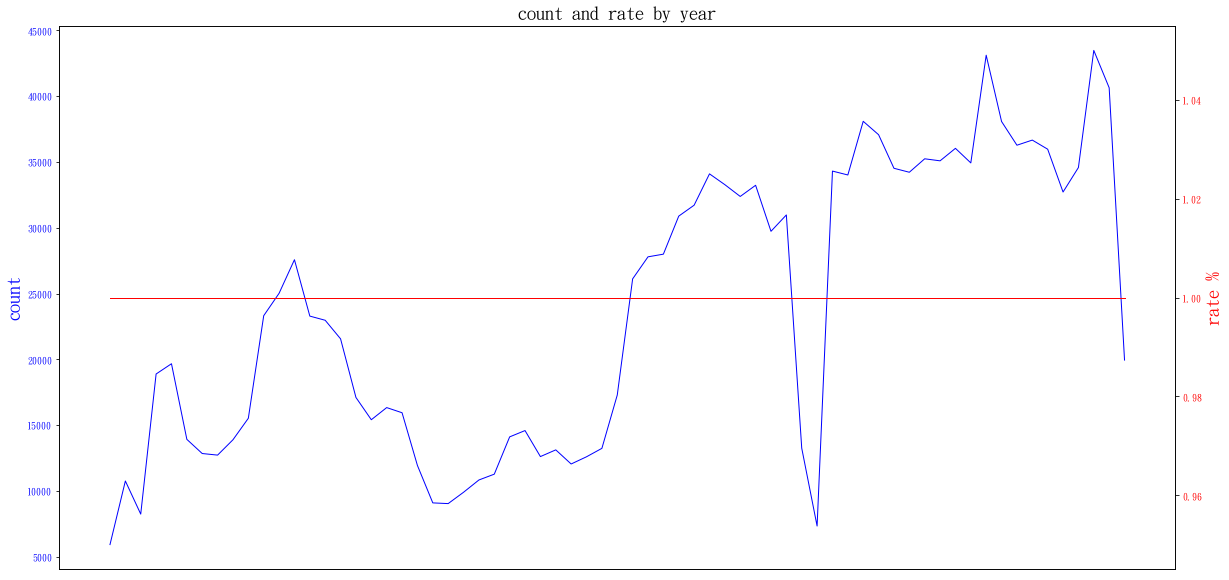

In [6]:

df_year=people.read_doc_select_year(path, unit, field, title)
people.plot_doc_select_year(df_year)

## 範例五：中華民族

In [6]:
# 選擇年度
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]

path="D:/my python/people/" 
kw=["中華民族","傳統文化","歷史悠久","民族文化","民族復興","民族主義","文化遗产","五千年","传统美德","中国文化"]
title="中華民族"
field ="token"     #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一
res=people.doc_select(year, path, title, kw, field, unit)
df=res[0]

1946 done 2 117260 1.7056114617090227e-05
1947 done 4 239468 1.6703693186563548e-05
1948 done 11 201284 5.4649152441326684e-05
1949 done 89 505117 0.000176196801929058
1950 done 81 621218 0.0001303890099771739
1951 done 80 559504 0.00014298378563870856
1952 done 88 417450 0.00021080368906455863
1953 done 110 521586 0.0002108952310836564
1954 done 146 505159 0.0002890179131718924
1955 done 171 593132 0.00028830007485686156
1956 done 230 783982 0.0002933740825682222
1957 done 209 968678 0.00021575797117308332
1958 done 152 980682 0.00015499417752135757
1959 done 178 991154 0.0001795886411193417
1960 done 165 977345 0.0001688247241250531
1961 done 141 797292 0.00017684863262142352
1962 done 148 611632 0.00024197556700761242
1963 done 128 616087 0.0002077628646603483
1964 done 237 668885 0.00035432099688287224
1965 done 129 667432 0.00019327811672200314
1966 done 126 549394 0.0002293436040437282
1967 done 26 420647 6.180954577115729e-05
1968 done 14 402227 3.48062163902473e-05
1969 done 16

In [3]:
# 讀取儲存之檔案，比較快
###############################
path="D:/my python/people/" 
title="中華民族"
field ="token"     #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一
df=people.read_doc_select(path, unit, field, title)

<Figure size 1440x720 with 0 Axes>

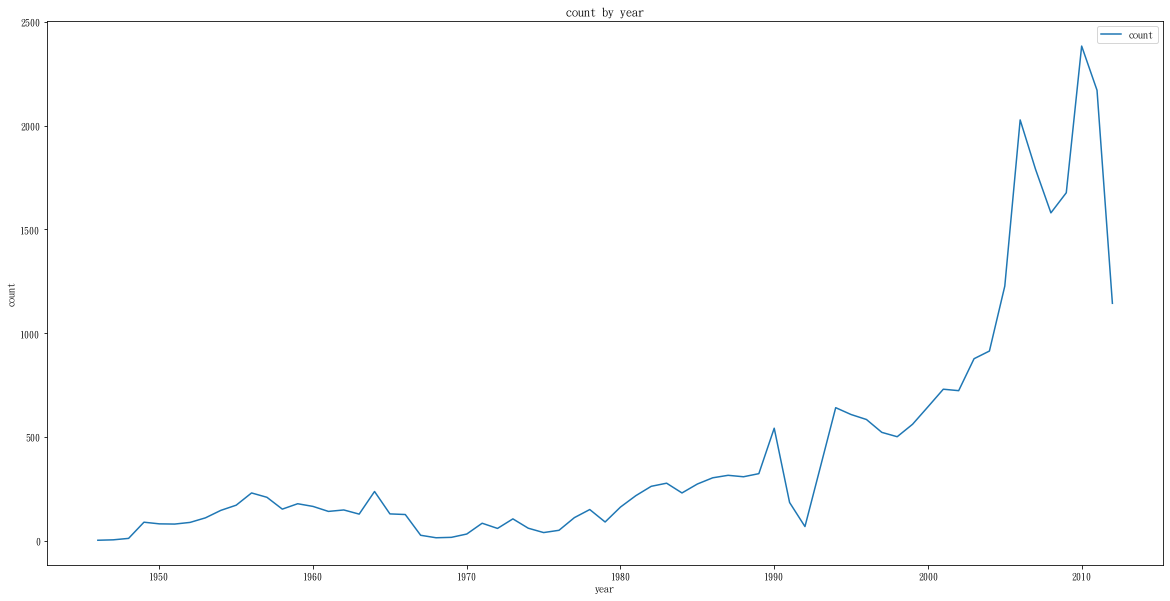

<Figure size 1440x720 with 0 Axes>

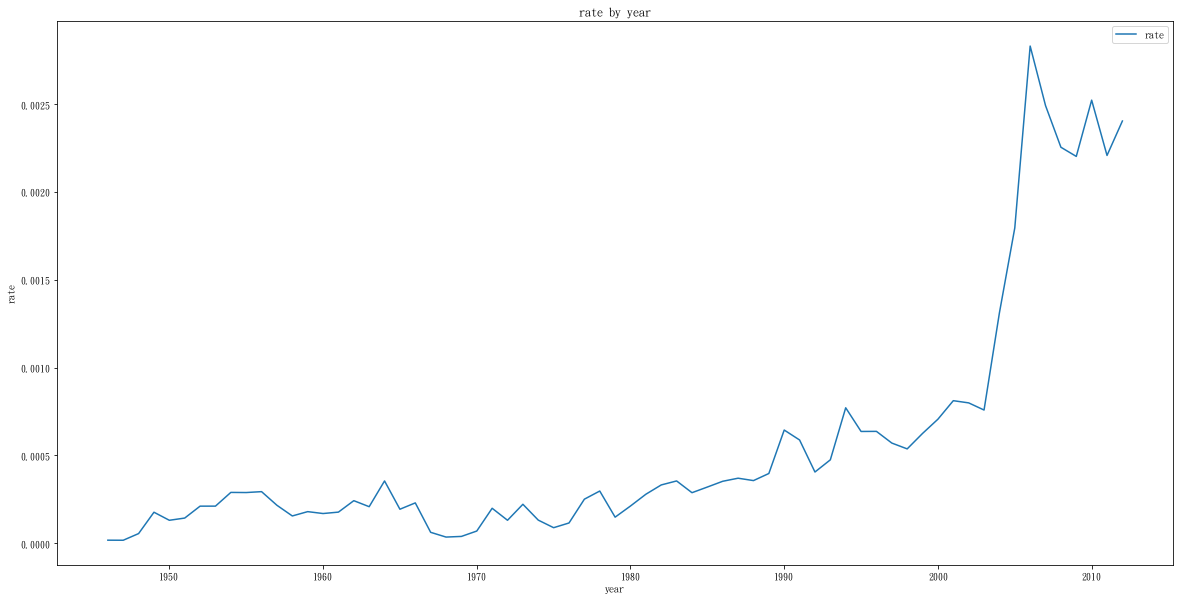

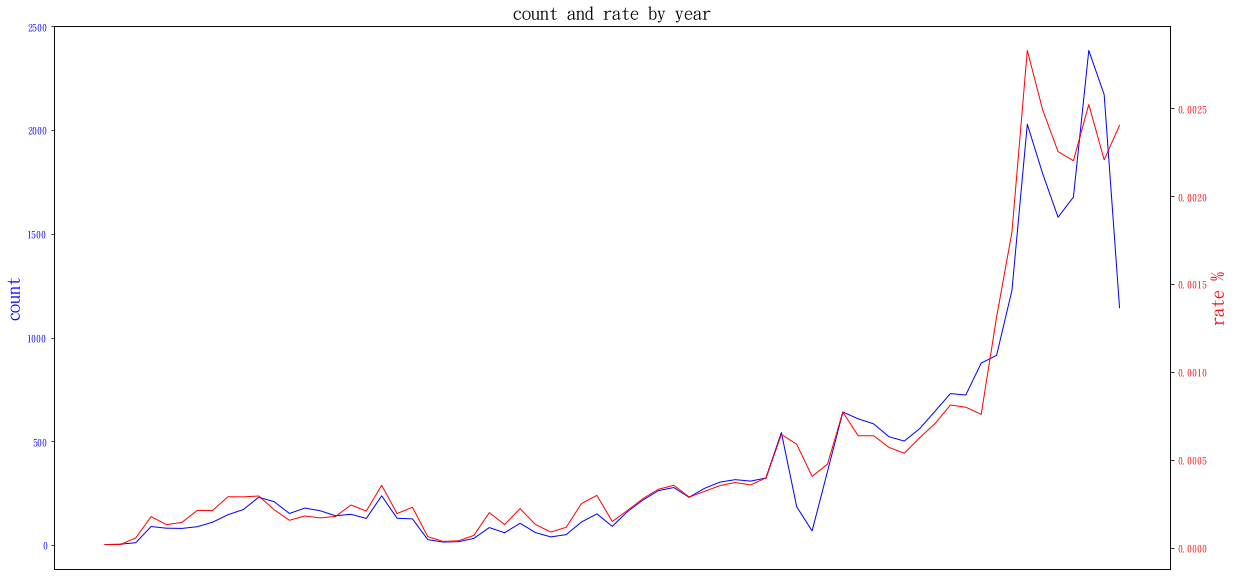

In [4]:
df_year=people.read_doc_select_year(path, unit, field, title)  
people.plot_doc_select_year(df_year)

In [5]:
filenames=["people_19520920_3_88803"]
field ="tfidf"     #  token, doc_content tfidf, treerank 四選一
people.print_filename(filenames, field)

人民日報_19520920_3_88803 -----------------
['吕志杰,群众,人民法庭,审判,案件,恶霸,邵犯,何天定,弄清,调查,农民,材料,妇女,老太婆,成安,妇女代表,何犯,审讯,张飞,罪恶,坏分子,说理,斗争,司法,旧社会,司法机关,正确,实事求是,问案,罪行,仇邦海,女孩子,洋县,毛主席,司法人员,群众路线,审判员,审理案件,地主,懂得,在工作中,错误,诬告,欺压,诉苦,干部,贫农,解放前,承认,案情,土地改革,控诉,特别强调,学习,游行,每到,揭发,工作组,截然不同,儿子,判决,采用,纠正,走路,成绩,办罪,政策,地点,证实,一九五一年,宣传,法庭调查,事实,相信群众,逮捕法办,薛述,坚定的,写状,正案,阶级成份,反革命分子,邓世觉,以一地,从远,不纵,主观臆断,动打,农会主任,民兵队长,邵世杰,认小,认大,姚坪,被辱,便用,对何,问何,当伪,报县,搞霉']


In [15]:
list(x)

[1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012]

# 關鍵詞範例

In [ ]:
kw=["美国","美帝"]
title="美国"

In [ ]:
kw=["苏修","苏联"]
title="苏联"

In [ ]:
kw=["孔子","孔老二","批林批孔","孔孟","儒家","克己复礼"]
title="孔孟"

In [ ]:
kw=["中華民族","傳統文化","歷史悠久","民族文化","民族復興","民族主義","文化遗产","五千年","传统美德","中国文化"]
title="中華民族"

In [ ]:
kw=["殖民主义","资本主义","资产阶级","帝国主義","反帝","反殖"]
title="帝国主義"

In [ ]:
kw=["马克思列宁主义","资本主义","资产阶级","帝国主義","反帝","反殖"]
title="帝国主義"

In [ ]:
kw=["毛泽东","毛主席", "毛泽东思想"]
title="毛泽东"